# Evaluation Project-8

# Rainfall Weather Forecasting

Problem Statement:
Rain Prediction –Weather forecasting

Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.

Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia. Here, predict two things:
 
1. Problem Statement: 
a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.

b)  Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.


Dataset Description:

Number of columns: 23


Date  - The date of observation

Location  -The common name of the location of the weather station

MinTemp  -The minimum temperature in degrees celsius

MaxTemp -The maximum temperature in degrees celsius

Rainfall  -The amount of rainfall recorded for the day in mm

Evaporation  -The so-called Class A pan evaporation (mm) in the 24 hours to 9am

Sunshine  -The number of hours of bright sunshine in the day.

WindGustDi r- The direction of the strongest wind gust in the 24 hours to midnight

WindGustSpeed -The speed (km/h) of the strongest wind gust in the 24 hours to midnight

WindDir9am -Direction of the wind at 9am

WindDir3pm -Direction of the wind at 3pm

WindSpeed9am -Wind speed (km/hr) averaged over 10 minutes prior to 9am

WindSpeed3pm -Wind speed (km/hr) averaged over 10 minutes prior to 3pm

Humidity9am -Humidity (percent) at 9am

Humidity3pm -Humidity (percent) at 3pm

Pressure9am -Atmospheric pressure (hpa) reduced to mean sea level at 9am

Pressure3pm -Atmospheric pressure (hpa) reduced to mean sea level at 3pm

Cloud9am - Fraction of sky obscured by cloud at 9am. 

Cloud3pm -Fraction of sky obscured by cloud 

Temp9am-Temperature (degrees C) at 9am

Temp3pm -Temperature (degrees C) at 3pm

RainToday -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0

RainTomorrow -The amount of next day rain in mm. Used to create response variable . A kind of measure of the "risk".


Dataset available below




Downlaod Files:
https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv
https://github.com/dsrscientist/dataset3

Predictions:<br>
    1. whether or not it will rain tomorrow.<br>
    2. to predict how much rainfall could be there.

📜 Note: Here we will be doing EDA with respect to both the target variables plotting graphs considering both target variables and at time of model testing and training we will do seperate analysis

In [1]:
# importing all libraries

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
import joblib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno

%matplotlib inline

from scipy.stats import skew, zscore
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor


#classification

from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
import lightgbm as lgb
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report


#regression

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [2]:
# To display maximum rows and columns in the dataset
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [3]:
# loading the dataset
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv',parse_dates=['Date'])
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


We can see that our dataset has 8425 rows and 23 columns.<br>
Also some NaN values are present in the dataset.<br>
Dataset has both object and numerical datatypes.<br>
Our classification target variable is Rain Tomorrow and regression target variables is Rainfall.

# Exploratory Data analysis(EDA)

In [4]:
df.shape

(8425, 23)

Shapes tells us we have 8425rows and 23 columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           8425 non-null   datetime64[ns]
 1   Location       8425 non-null   object        
 2   MinTemp        8350 non-null   float64       
 3   MaxTemp        8365 non-null   float64       
 4   Rainfall       8185 non-null   float64       
 5   Evaporation    4913 non-null   float64       
 6   Sunshine       4431 non-null   float64       
 7   WindGustDir    7434 non-null   object        
 8   WindGustSpeed  7434 non-null   float64       
 9   WindDir9am     7596 non-null   object        
 10  WindDir3pm     8117 non-null   object        
 11  WindSpeed9am   8349 non-null   float64       
 12  WindSpeed3pm   8318 non-null   float64       
 13  Humidity9am    8366 non-null   float64       
 14  Humidity3pm    8323 non-null   float64       
 15  Pressure9am    7116 n

We can see that some columns have missing values.and we have 16 columns of float datatype and 7 columns of object datatype

# Checking Duplicates

In [6]:
df.duplicated().sum()

1663

In [7]:
#Removing all duplicates
df.drop_duplicates(inplace =True )
df.shape

(6762, 23)

After removing duplicates we now have 

# Checking Unique Values and Value Counts

In [8]:
df.nunique().sort_values().to_frame("Unique Values")

,Unique Values
RainTomorrow,2
RainToday,2
Cloud3pm,9
Cloud9am,9
Location,12
WindDir3pm,16
WindDir9am,16
WindGustDir,16
WindSpeed9am,34
WindSpeed3pm,35


In [9]:
#Handling the date column

df['Month']= df['Date'].dt.month_name()
df['Year']=df['Date'].dt.year
df['Day']=df['Date'].dt.day
df.drop('Date',axis=1,inplace=True)

In [10]:
df.shape

(6762, 25)

In [11]:
for i in df:
    print(i)
    print(df[i].value_counts())
    print('*'*120)

Location
PerthAirport    1204
Albury           907
Newcastle        822
Melbourne        811
Williamtown      615
CoffsHarbour     611
Brisbane         579
Penrith          482
Darwin           250
Wollongong       237
Adelaide         205
Uluru             39
Name: Location, dtype: int64
************************************************************************************************************************
MinTemp
 13.2    58
 12.0    57
 14.8    53
 12.7    53
 10.8    52
 17.8    51
 13.8    51
 16.4    51
 11.4    50
 13.3    48
 10.0    48
 18.0    47
 10.5    47
 14.2    47
 13.0    47
 18.4    46
 11.5    45
 10.2    45
 16.1    45
 8.0     45
 13.7    44
 12.5    44
 9.4     44
 18.8    44
 15.6    44
 18.5    44
 8.2     44
 14.4    43
 16.7    43
 12.3    43
 12.1    43
 8.4     43
 18.2    43
 10.7    43
 19.4    43
 14.5    42
 17.1    42
 13.9    42
 18.7    42
 10.1    42
 17.2    42
 17.5    42
 12.8    42
 11.2    42
 9.5     41
 16.0    41
 11.8    41
 8.8     41
 9.1 

# Checking Null Values

In [12]:
df.isnull().sum()

Location            0
MinTemp            70
MaxTemp            57
Rainfall          138
Evaporation      2921
Sunshine         3236
WindGustDir       942
WindGustSpeed     942
WindDir9am        794
WindDir3pm        294
WindSpeed9am       63
WindSpeed3pm      100
Humidity9am        54
Humidity3pm        96
Pressure9am      1308
Pressure3pm      1311
Cloud9am         1866
Cloud3pm         1902
Temp9am            51
Temp3pm            92
RainToday         138
RainTomorrow      138
Month               0
Year                0
Day                 0
dtype: int64

<AxesSubplot:>

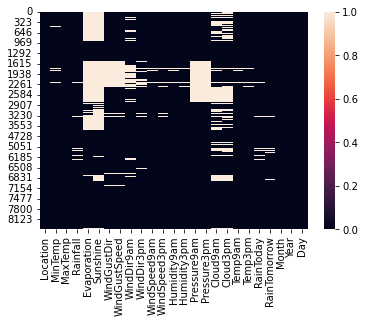

In [13]:
sns.heatmap(df.isnull())

We can see there are missing values in our data.Lets treat them

# Treating Null Values

Columns which have missing values more than half its total count i.e 3381 are Evaporation, Sunshine. These columns can be dropped completly.<br>
Columns having object datatype and missing values are: WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow. Missing values of these columns will be replaced by mode.<br>
Columns having float datatype and missing values are:MinTemp, MaxTemp ,Rainfall, Evaporation,Sunshine,WindGustSpeed ,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm, Temp9am,Temp3pm. These will be replaced by mean values of their columns


In [14]:
df.drop(['Evaporation','Sunshine'], axis=1, inplace=True)
df.shape

(6762, 23)

In [15]:
# getting list of object data type column names
obj_d = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'object':
        obj_d.append(x)
print(f"Object Data Type Columns are: ", obj_d)


# getting the list of float data type column names
num_d = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'float64'  or df.dtypes[x] == 'int64':
        num_d.append(x)
print(f"Numerical Data Type Columns are: ", num_d)

Object Data Type Columns are:  ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow', 'Month']
Numerical Data Type Columns are:  ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Year', 'Day']


In [16]:
# filling missing values of categorical columns
df['WindGustDir'].fillna(df['WindGustDir'].mode()[0], inplace =True)
df['WindDir9am'].fillna(df['WindDir9am'].mode()[0], inplace =True)
df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0], inplace =True)
df['RainToday'].fillna(df['RainToday'].mode()[0], inplace =True)
df['RainTomorrow'].fillna(df['RainTomorrow'].mode()[0], inplace =True)


#filling missing values of numerical data
df['MinTemp'].fillna(df['MinTemp'].mean(), inplace =True)
df['MaxTemp'].fillna(df['MaxTemp'].mean(), inplace =True)
df['Rainfall'].fillna(df['Rainfall'].mean(), inplace =True)
df['WindGustSpeed'].fillna(df['WindGustSpeed'].mean(), inplace =True)
df['WindSpeed9am'].fillna(df['WindSpeed9am'].mean(), inplace =True)
df['WindSpeed3pm'].fillna(df['WindSpeed3pm'].mean(), inplace =True)
df['Humidity9am'].fillna(df['Humidity9am'].mean(), inplace =True)
df['Humidity3pm'].fillna(df['Humidity3pm'].mean(), inplace =True)
df['Pressure9am'].fillna(df['Pressure9am'].mean(), inplace =True)
df['Pressure3pm'].fillna(df['Pressure3pm'].mean(), inplace =True)
df['Cloud9am'].fillna(df['Cloud9am'].mean(), inplace =True)
df['Cloud3pm'].fillna(df['Cloud3pm'].mean(), inplace =True)
df['Temp9am'].fillna(df['Temp9am'].mean(), inplace =True)
df['Temp3pm'].fillna(df['Temp3pm'].mean(), inplace =True)



In [17]:
df.head(15)

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month,Year,Day
0,Albury,13.4,22.9,0.6,W,44.000000,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.320988,16.9,21.8,No,No,December,2008,1
1,Albury,7.4,25.1,0.0,WNW,44.000000,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,4.336806,4.320988,17.2,24.3,No,No,December,2008,2
2,Albury,12.9,25.7,0.0,WSW,46.000000,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,4.336806,2.000000,21.0,23.2,No,No,December,2008,3
3,Albury,9.2,28.0,0.0,NE,24.000000,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,4.336806,4.320988,18.1,26.5,No,No,December,2008,4
4,Albury,17.5,32.3,1.0,W,41.000000,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,No,No,December,2008,5
5,Albury,14.6,29.7,0.2,WNW,56.000000,W,W,19.0,24.0,55.0,23.0,1009.2,1005.4,4.336806,4.320988,20.6,28.9,No,No,December,2008,6
6,Albury,14.3,25.0,0.0,W,50.000000,SW,W,20.0,24.0,49.0,19.0,1009.6,1008.2,1.000000,4.320988,18.1,24.6,No,No,December,2008,7
7,Albury,7.7,26.7,0.0,W,35.000000,SSE,W,6.0,17.0,48.0,19.0,1013.4,1010.1,4.336806,4.320988,16.3,25.5,No,No,December,2008,8
8,Albury,9.7,31.9,0.0,NNW,80.000000,SE,NW,7.0,28.0,42.0,9.0,1008.9,1003.6,4.336806,4.320988,18.3,30.2,No,Yes,December,2008,9
9,Albury,13.1,30.1,1.4,W,28.000000,S,SSE,15.0,11.0,58.0,27.0,1007.0,1005.7,4.336806,4.320988,20.1,28.2,Yes,No,December,2008,10


<AxesSubplot:>

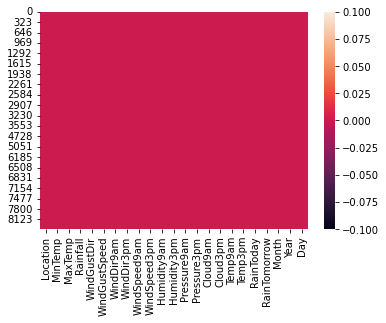

In [18]:
sns.heatmap(df.isnull())

Hence we have removed all missing values.

In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,6762.0,13.109145,5.540667,-2.0,9.0,13.109145,17.4,28.5
MaxTemp,6762.0,24.098345,6.130123,8.2,19.6,23.500000,28.4,45.5
Rainfall,6762.0,2.780148,10.482769,0.0,0.0,0.000000,1.2,371.0
WindGustSpeed,6762.0,38.977663,13.376457,7.0,30.0,38.977663,46.0,107.0
WindSpeed9am,6762.0,12.782206,9.787577,0.0,6.0,11.000000,19.0,63.0
WindSpeed3pm,6762.0,17.571150,9.548634,0.0,11.0,17.000000,24.0,83.0
Humidity9am,6762.0,67.506559,17.182700,10.0,56.0,68.000000,80.0,100.0
Humidity3pm,6762.0,50.467147,18.498341,6.0,38.0,50.000000,62.0,99.0
Pressure9am,6762.0,1017.626311,6.027914,989.8,1014.2,1017.626311,1020.9,1039.0
Pressure3pm,6762.0,1015.119923,5.967638,982.9,1011.5,1015.119923,1018.4,1036.0


Observations:
1. Count of all columns is same.<br>
2. Columns where mean>median : Rainfall, WindSpeed9am,WindSpeed3pm. these are right skewed.<br>
3. Columns where meadian>mean: Humidity9am, Day. These are left skewwed.<br>
4. Columns having large difference between 75% and max value are: MinTemp, MaxTemp, Rainfall etc . These columns have outliers.
    

# Visualizations

**Univariate Analysis**

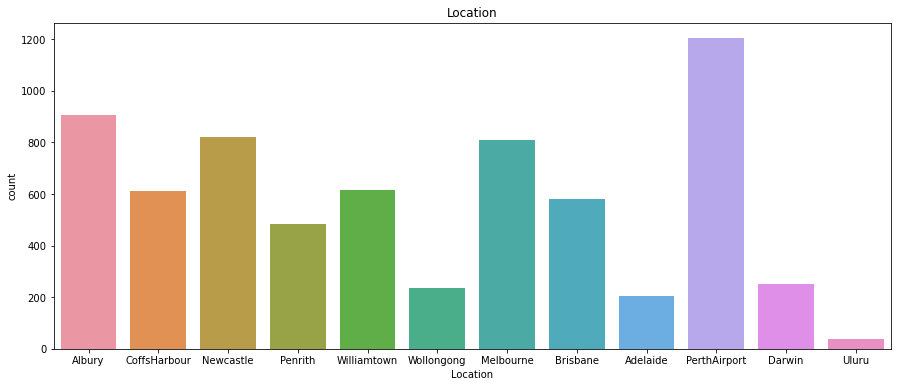

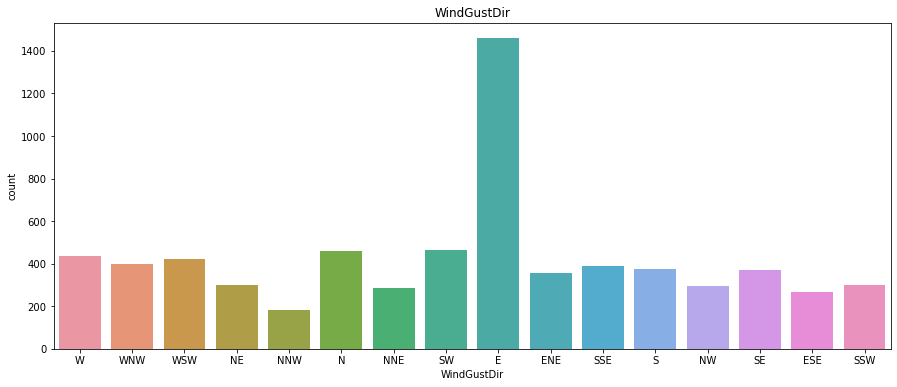

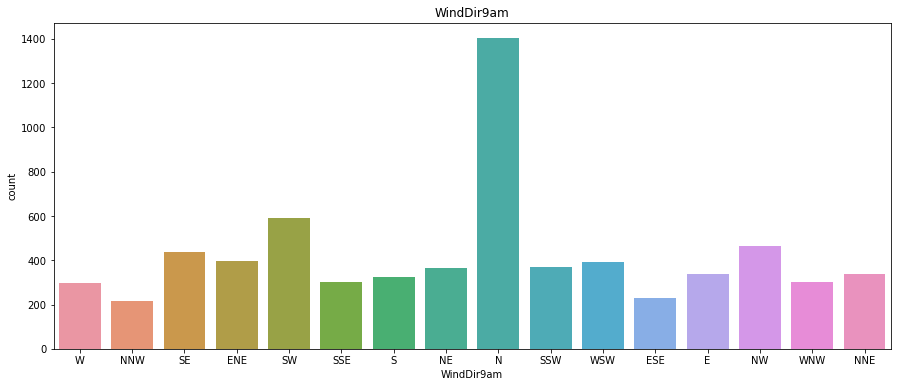

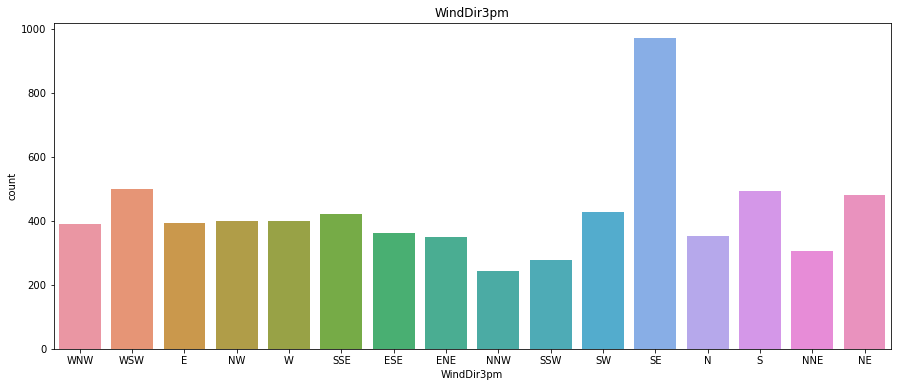

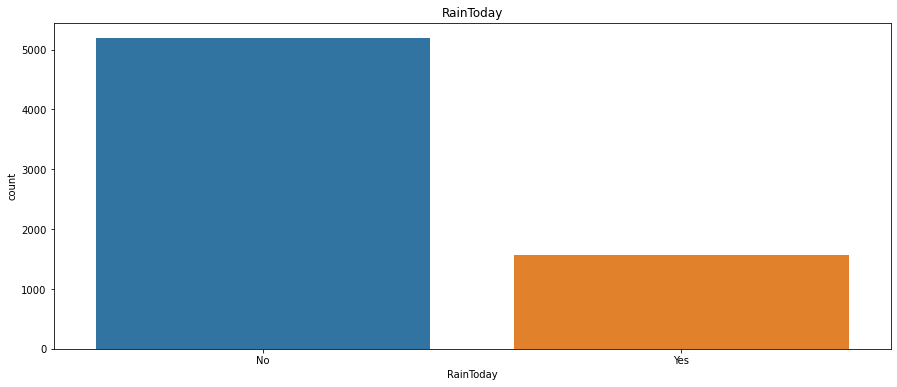

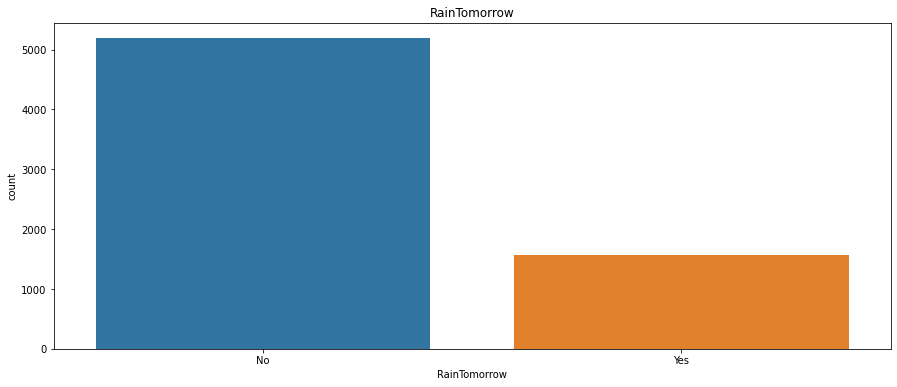

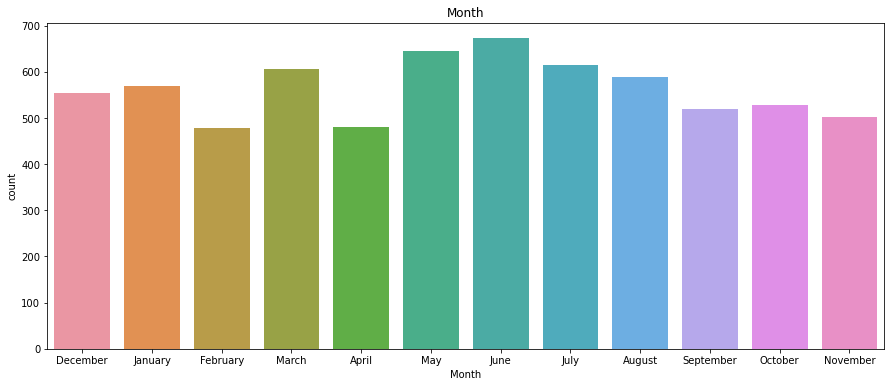

In [20]:
# plotting categorical data
for column in df.columns:
    if df[column].dtypes == object:
        plt.figure(figsize=(15,6))
        sns.countplot(df[column])
        plt.title(column)
        plt.show()
        

Above I have done univariate analysis of categorical data. There observations are as follows:
1. PerthAirport location has highest records of observation in our data, followed by albury.
2. Most of the time west gust direction is East. Also we have filled the missing values with mode so we are getting east.<br>
3. Wind diirection at 9 am is mostly north, again same we have used mode to fill missing values.<br>
4. Wind diirection at 3 pm is mostly southeast, again same we have used mode to fill missing values.<br>
5. Most times it does not rain as seen in rain today and rain tomorrow graphs.<br>
6. We have most recorded data of June.<br>

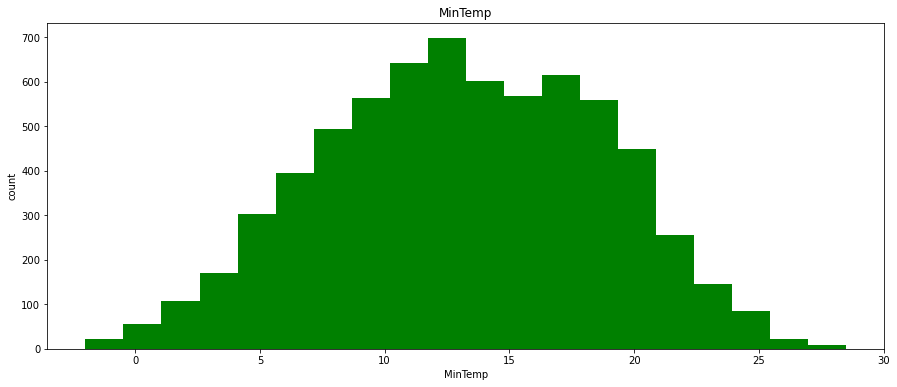

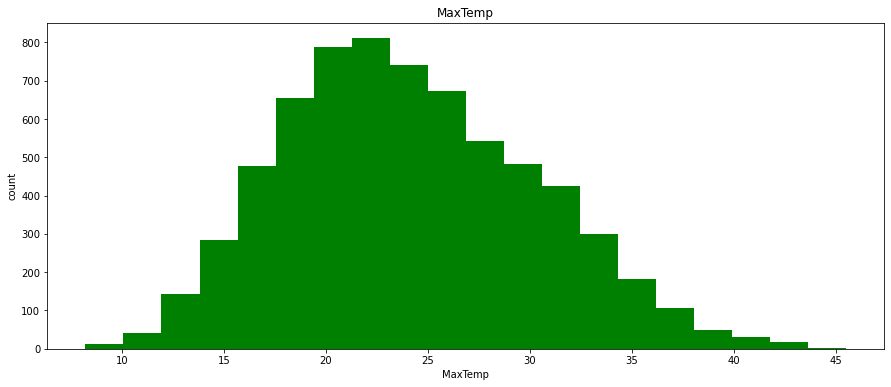

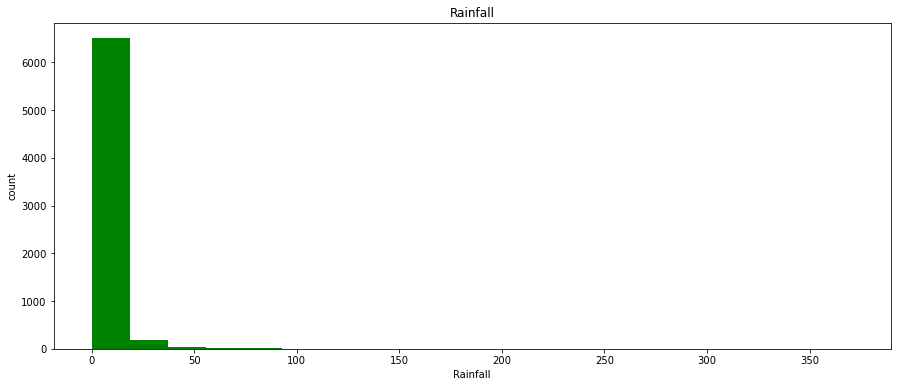

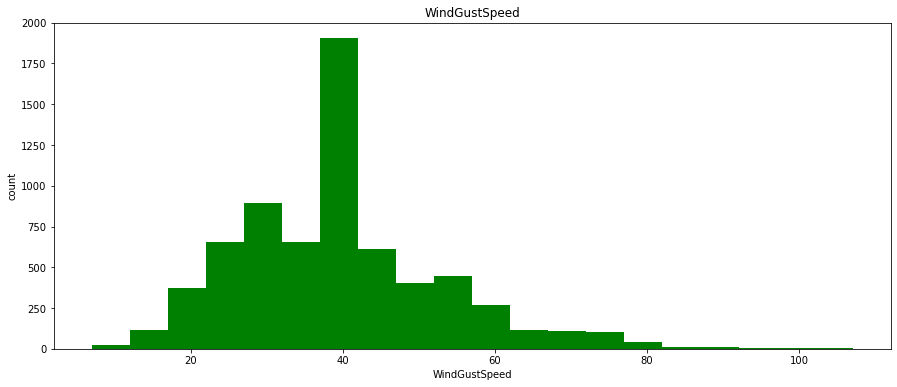

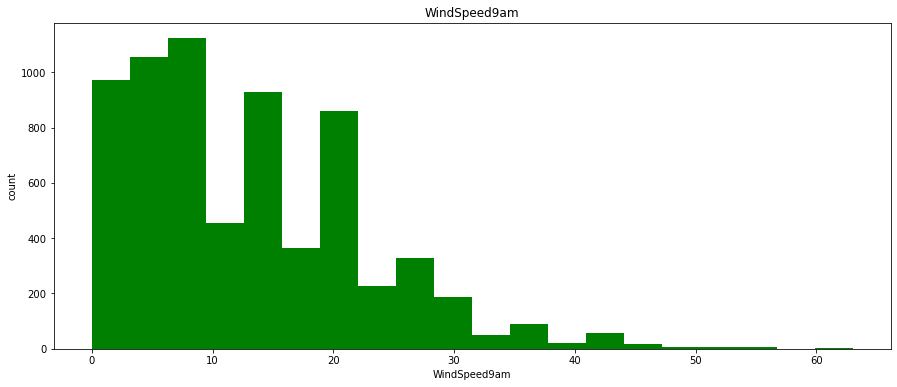

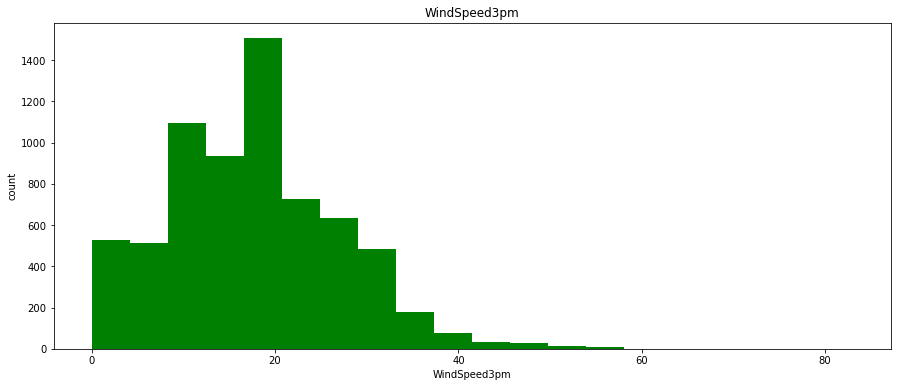

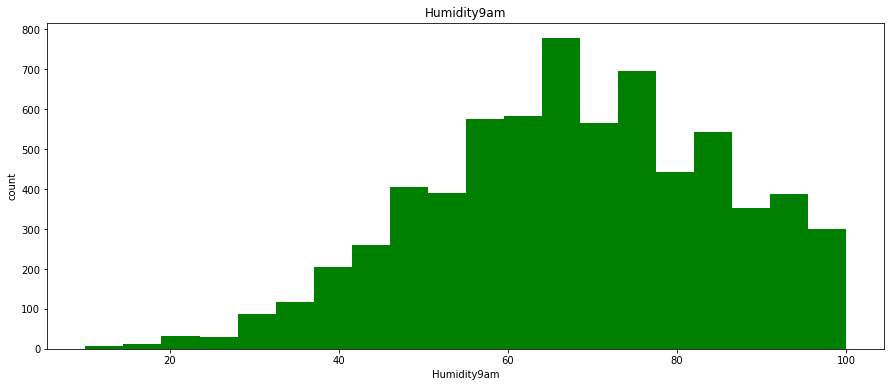

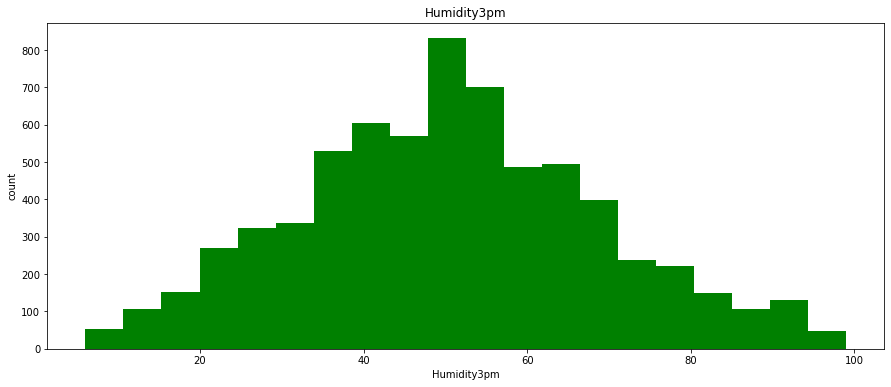

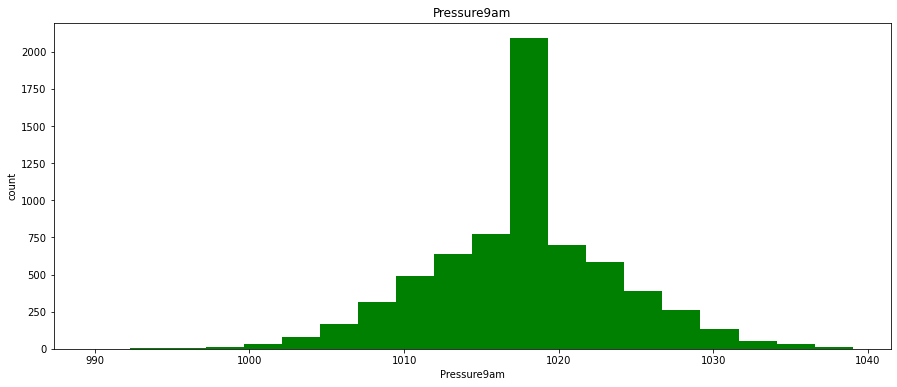

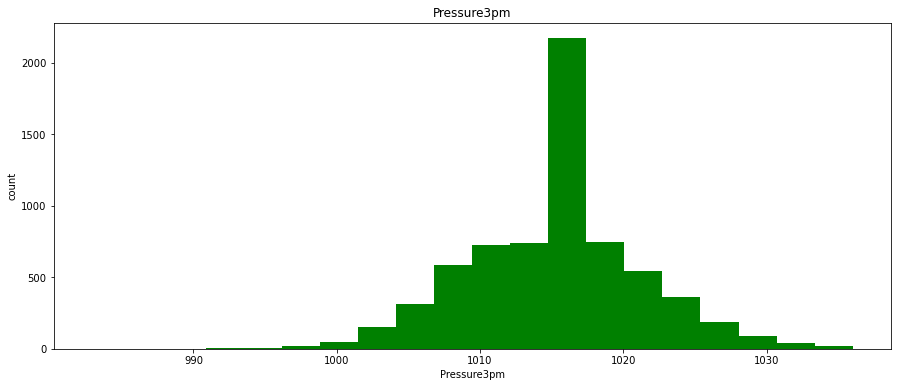

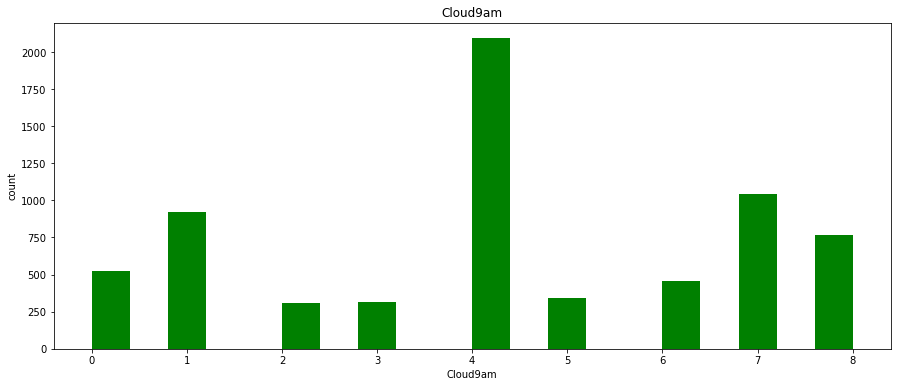

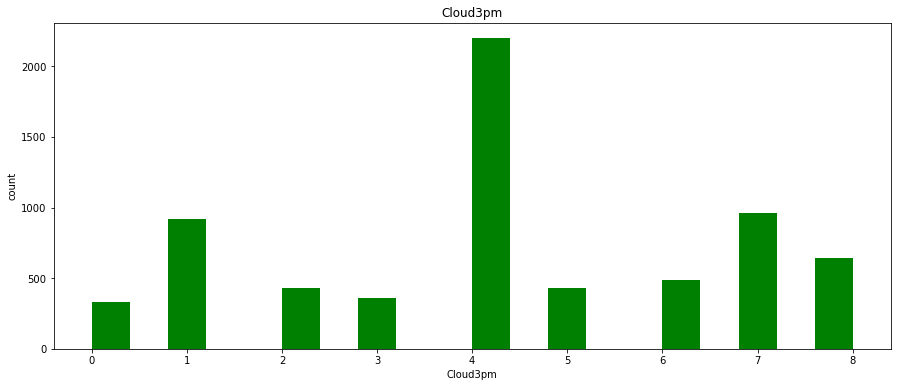

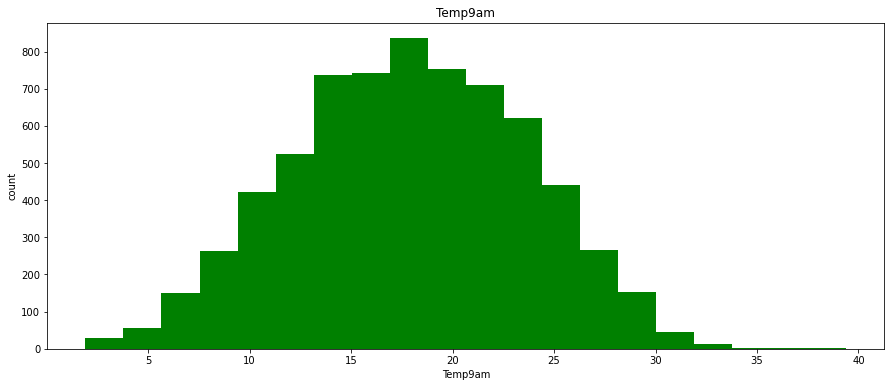

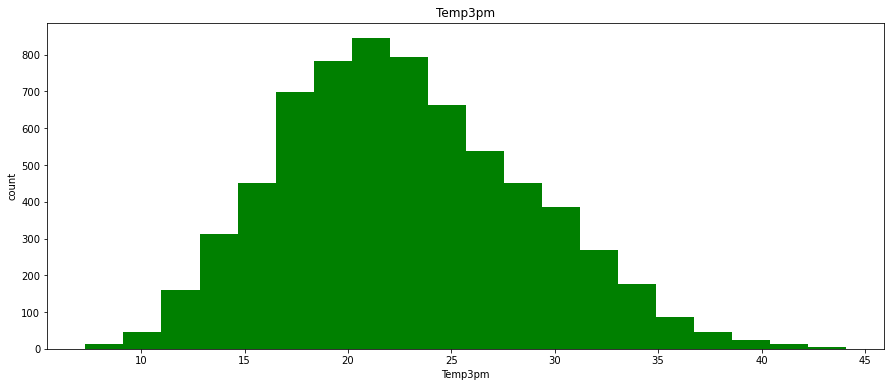

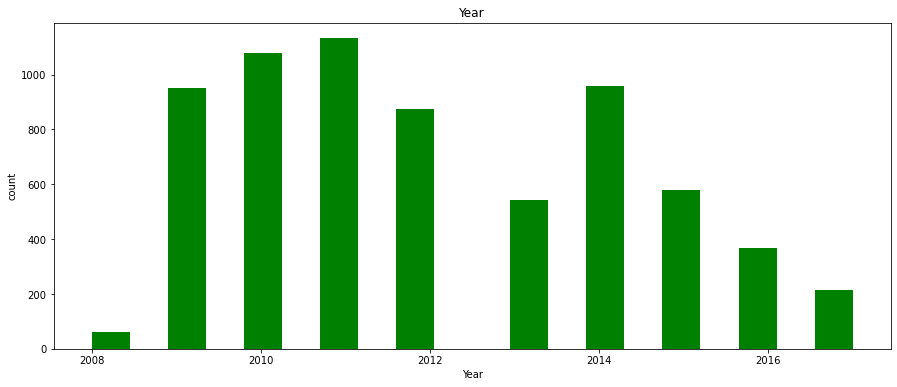

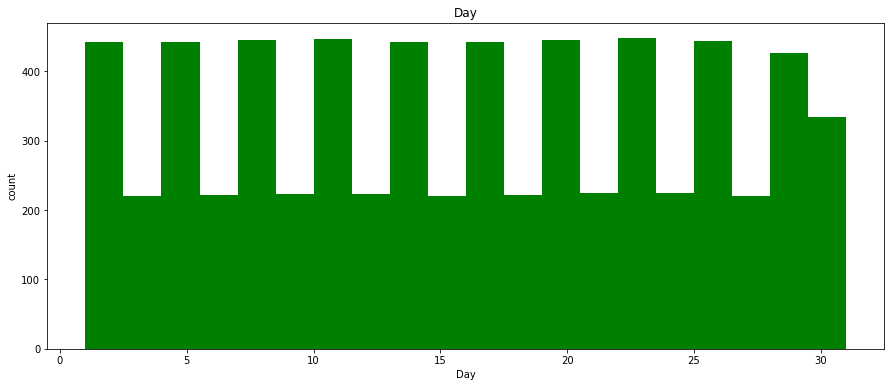

In [21]:
# plotting numerical data
for column in df.columns:
    if df[column].dtypes == 'float64' or df[column].dtypes == 'int64':
        plt.figure(figsize=(15,6))
        df[column].hist(bins=20, grid =False, color='green')
        plt.xlabel(column)
        plt.ylabel('count')
        plt.title(column)
        plt.show()
        

Observations:
1. Highest minimum temperature is recorded between range 10-15.<br>
2. Highest Maximum temperature is recorded between range 22-25 <br>
3. Rainfall is less than 50 in all data.<br>
4. Max wind gust speed recorded is 40.<br>
5. Max wind speed at 9 am is in range 0-10, whereas at 3pm it is in range 18-22.<br>
6. Maximum humidity at 9am is in recorded ub range 68-78 and at 3pm it is in range 50-60<br>
7. Max pressure at 9am is 1018-1020 whereas at 3pm also it is max in same range.<br>
8. Max temp at 9am is between 18-20 whereat at 3pm it is 21-25.<br>


**Bivariate Analysis**

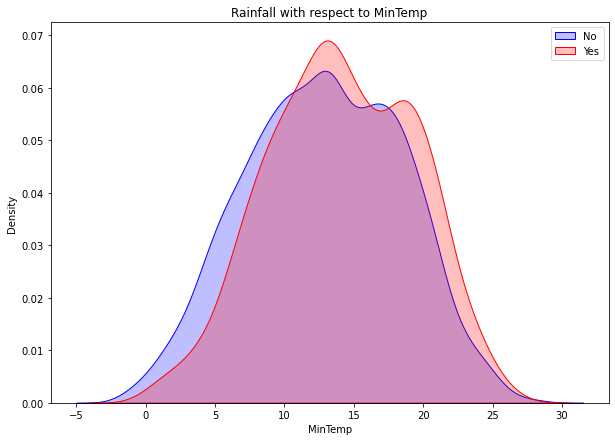

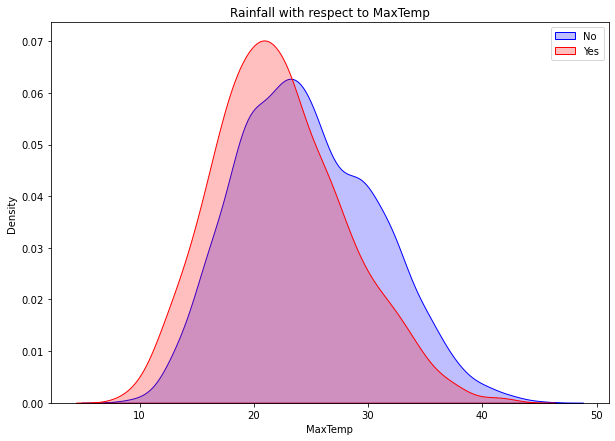

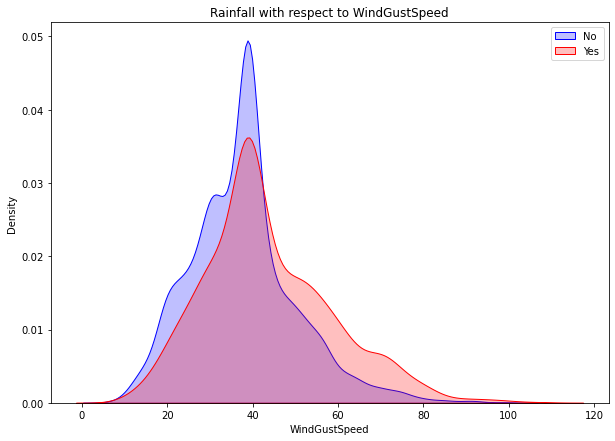

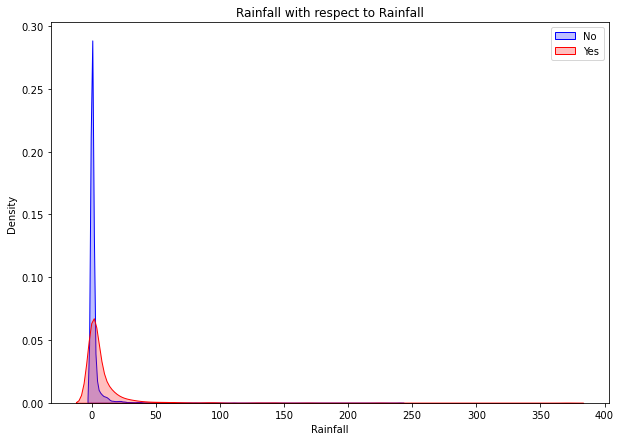

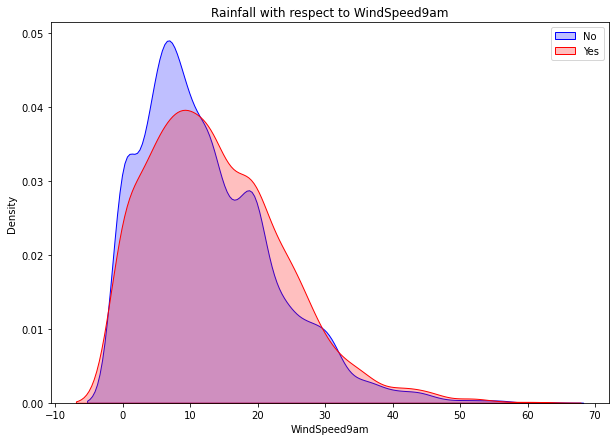

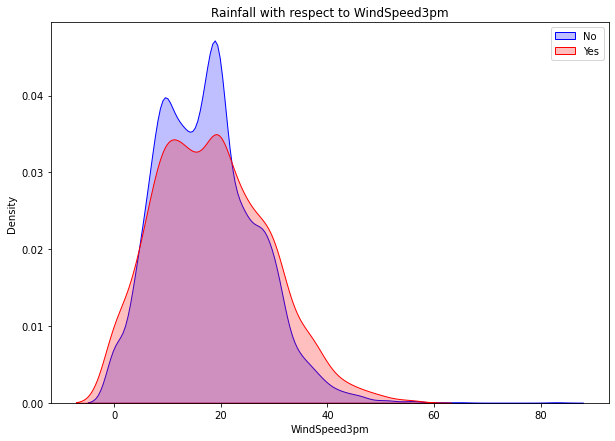

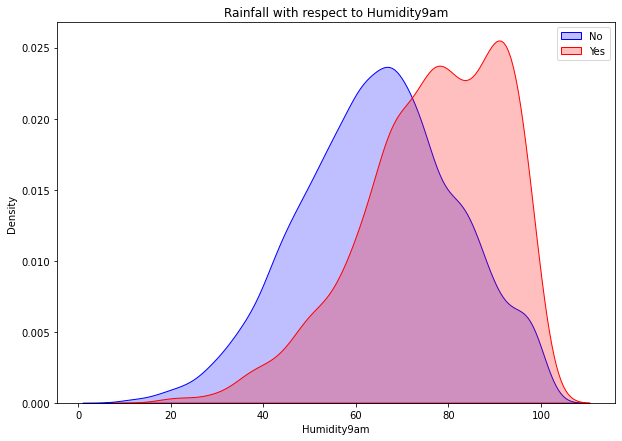

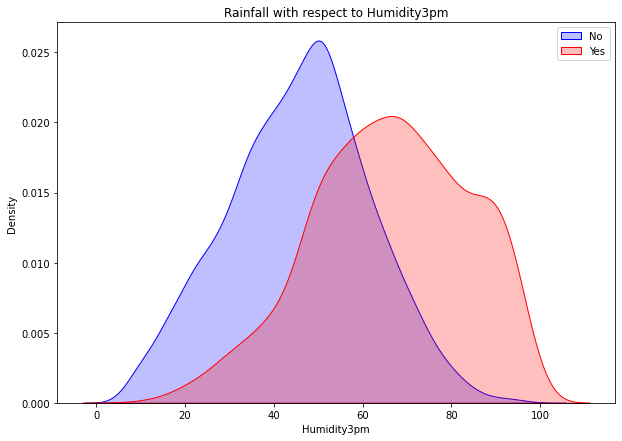

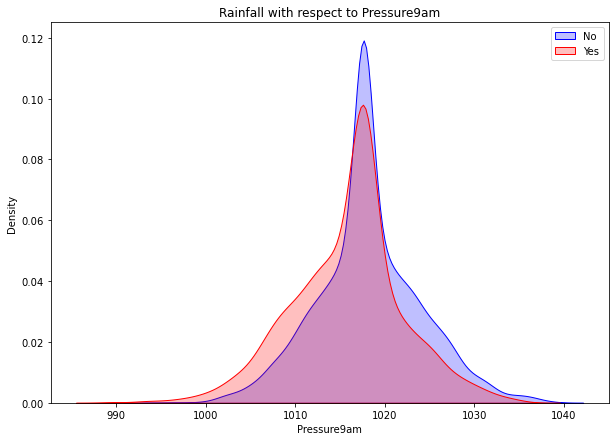

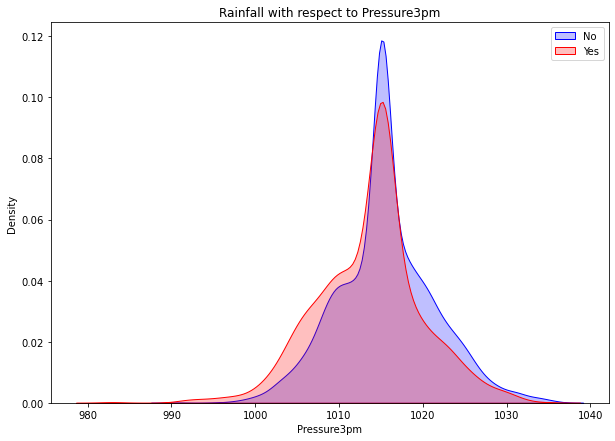

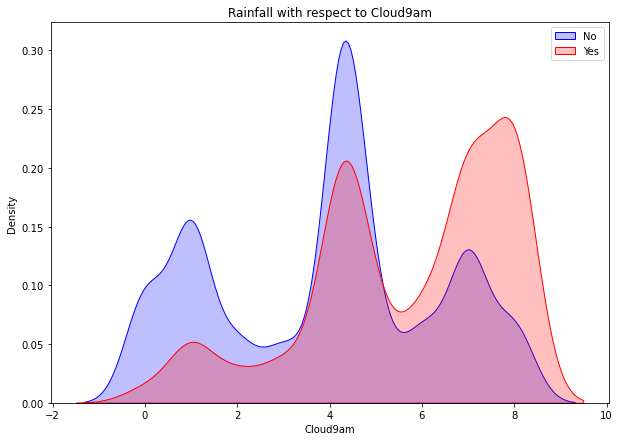

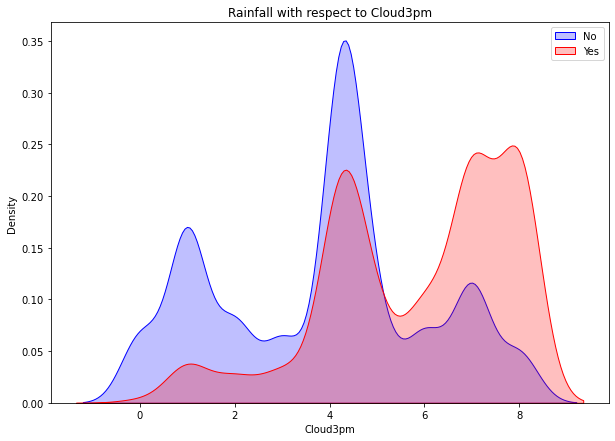

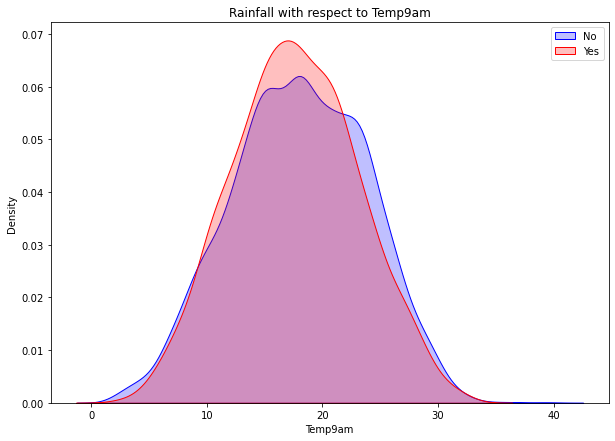

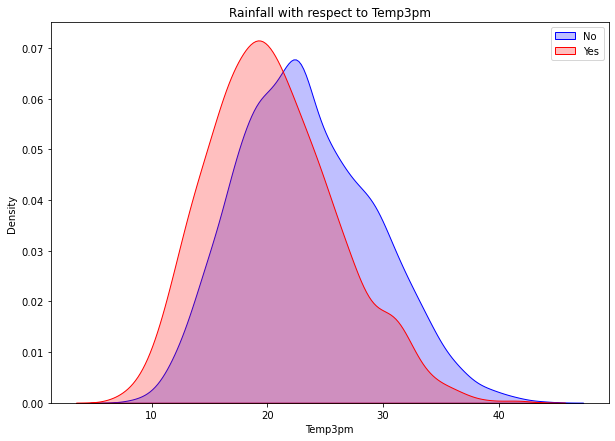

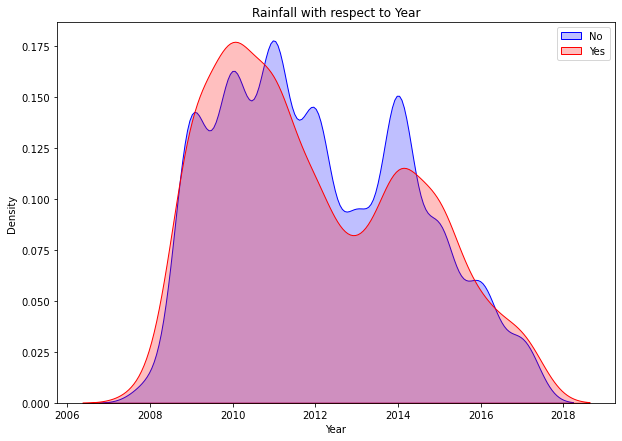

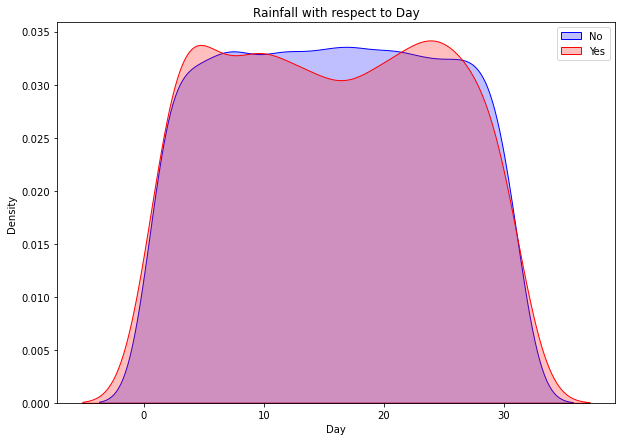

In [22]:
# plotting continuous feature variable against classification target variable RainTomorrow
list1 =  ['MinTemp', 'MaxTemp', 'WindGustSpeed', 'Rainfall','WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
          'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Year', 'Day']

for z in df[list1]:
    fig = plt.figure(figsize=(10,7))
    ax=sns.kdeplot(df.loc[(df['RainTomorrow'] == 'No'),z], color='b', shade=True, label='No ') 
    ax=sns.kdeplot(df.loc[(df['RainTomorrow'] == 'Yes'),z], color='r', shade=True, label='Yes')
    plt.title('Rainfall with respect to {}'.format(z))
    plt.legend()
    plt.show()

Observations:
1.When temp is less there is no rainfall and vice versa.<br>
2.For wind gust speed less than 40 there is usually no rainfall and wind gust speed above 40, there is rainfall.<br>
3.For wind speed at 9am and 3pm below 20 there is no rainfall.<br>
4.There is no rainfall for humidity level below 75 at 9am and no rainfall for humdity level below 60 at 3pm.<br>
5.When pressure is less there is rainfall.<br>
6.Cloud at 9am and 3pm below 4 genrally gives no rainfall.<br>
7.When temp is less than 20 at 9am and 3pm there is chances of rainfall.<br>


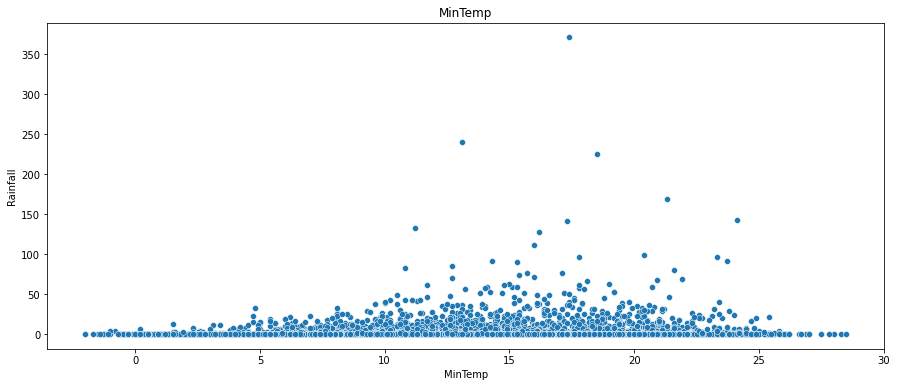

****************************************************************************************************


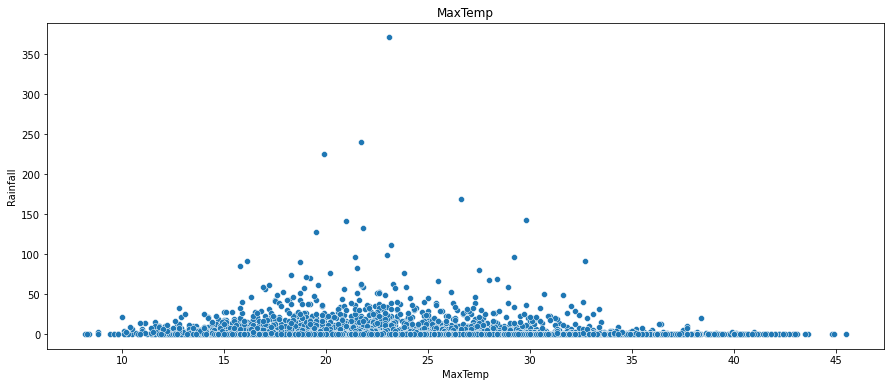

****************************************************************************************************


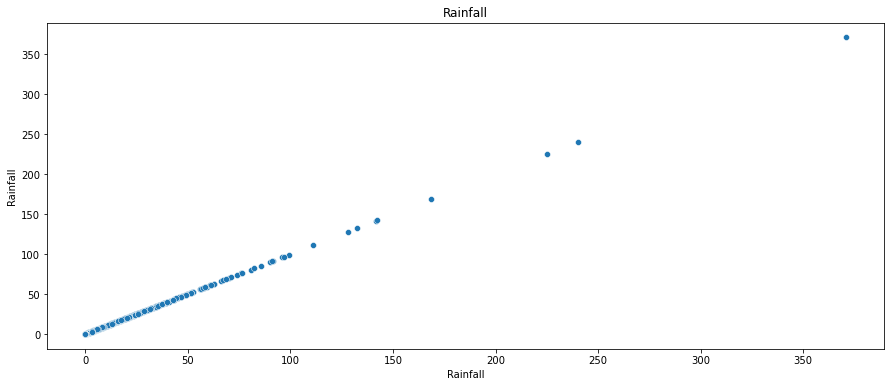

****************************************************************************************************


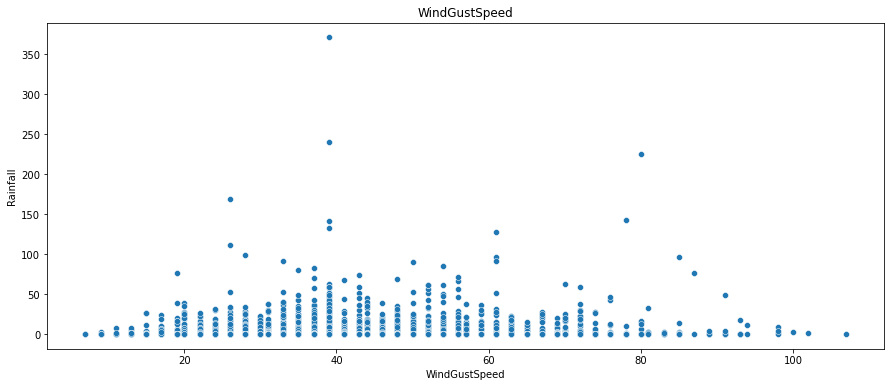

****************************************************************************************************


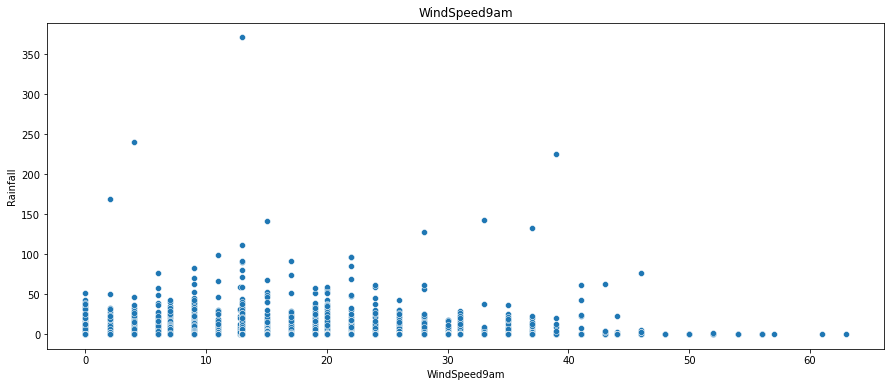

****************************************************************************************************


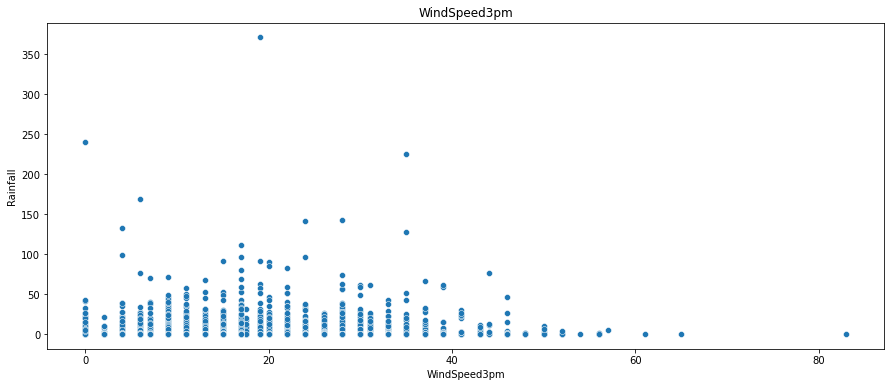

****************************************************************************************************


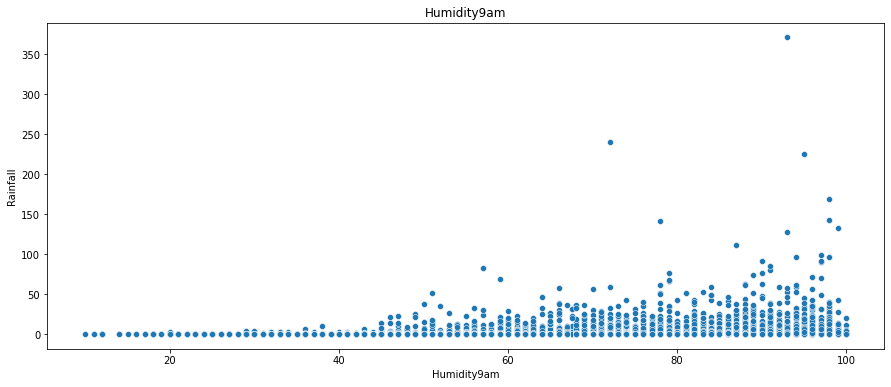

****************************************************************************************************


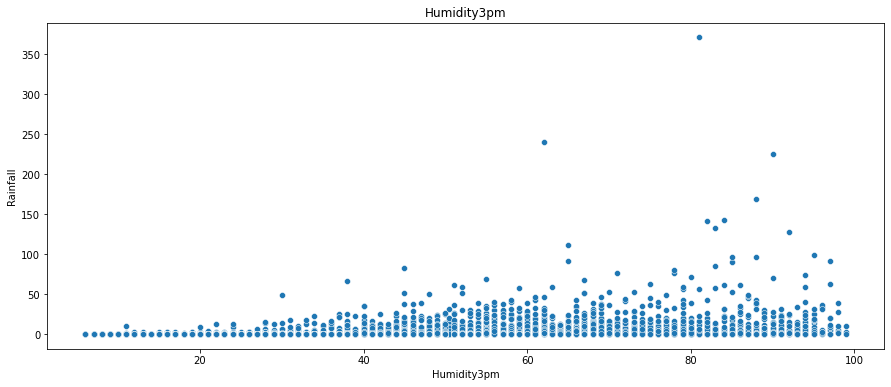

****************************************************************************************************


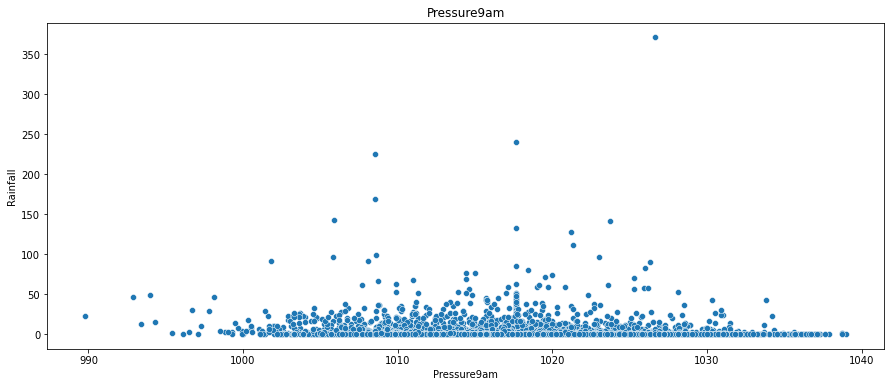

****************************************************************************************************


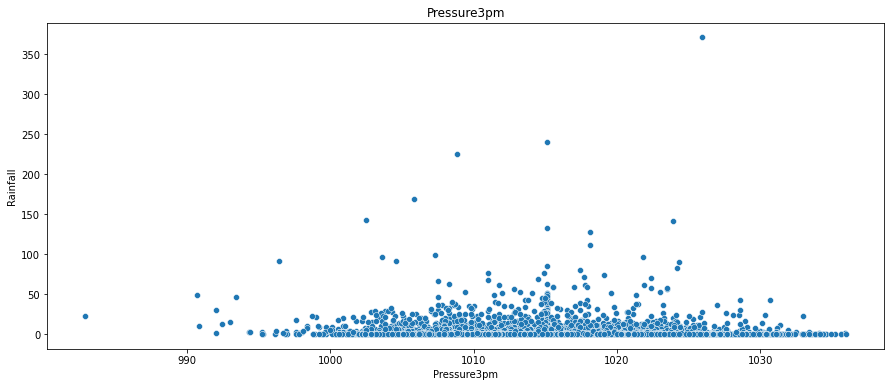

****************************************************************************************************


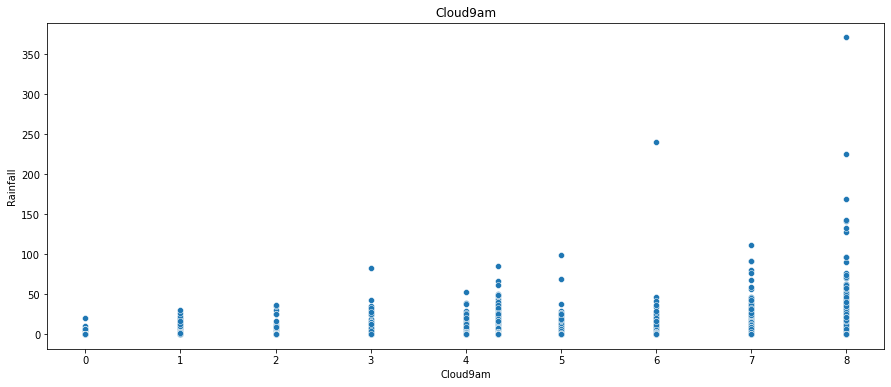

****************************************************************************************************


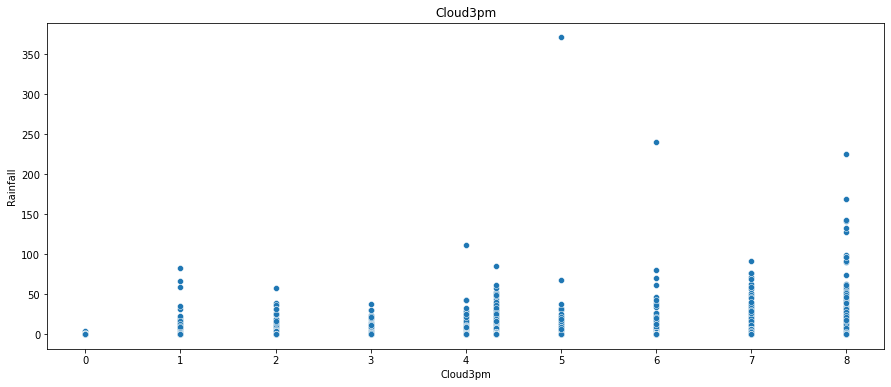

****************************************************************************************************


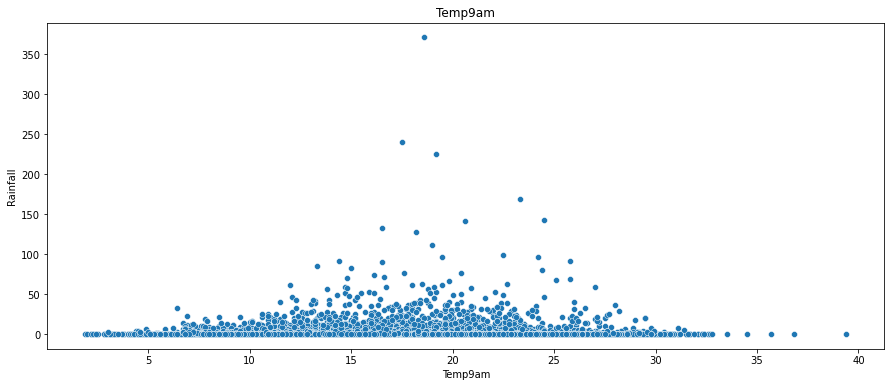

****************************************************************************************************


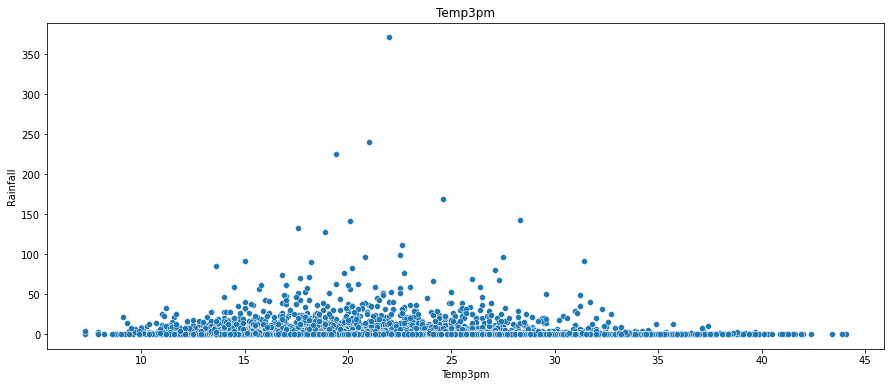

****************************************************************************************************


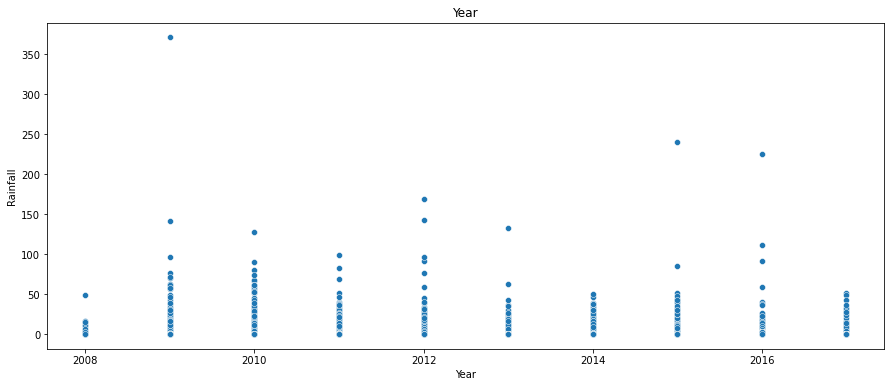

****************************************************************************************************


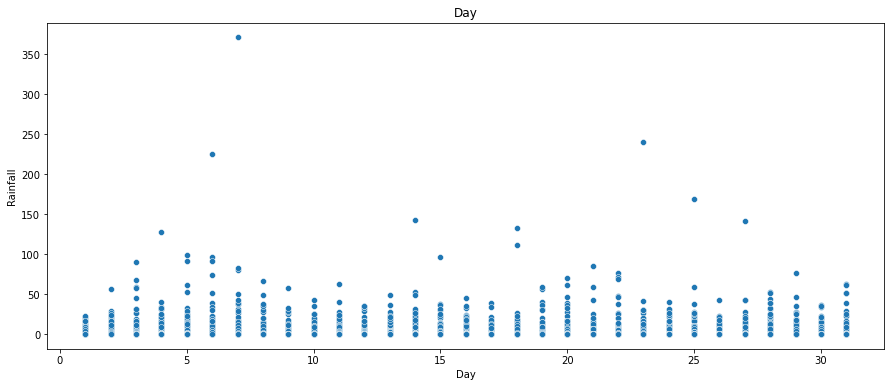

****************************************************************************************************


In [23]:
# plotting continuous feature variables versus regression target variable 'Rainfall'
for column in df.columns:
    if (df[column].dtypes == 'int64') or (df[column].dtypes == 'float64'):
        plt.figure(figsize=(15,6))
        sns.scatterplot(data= df,x= df[column], y= 'Rainfall')
        plt.xlabel(column)
        plt.ylabel('Rainfall')
        plt.title(column)
        plt.show()
        print('*'*100)

Observations:
1.Rainfall is maximum for mintemp range between 15-20.<br>
2.Rainfall is maximum for maxtemp range betweem 20-25.<br>
3.Rainfall is maximum at wind speed 40.<br>
4.When humidity is high it results in more rainfall.<br>
5.High pressure results in more rainfall.<br>
6.Temp range between 15-20 given maximum rainfall.<br>

Location vs RainTomorrow column


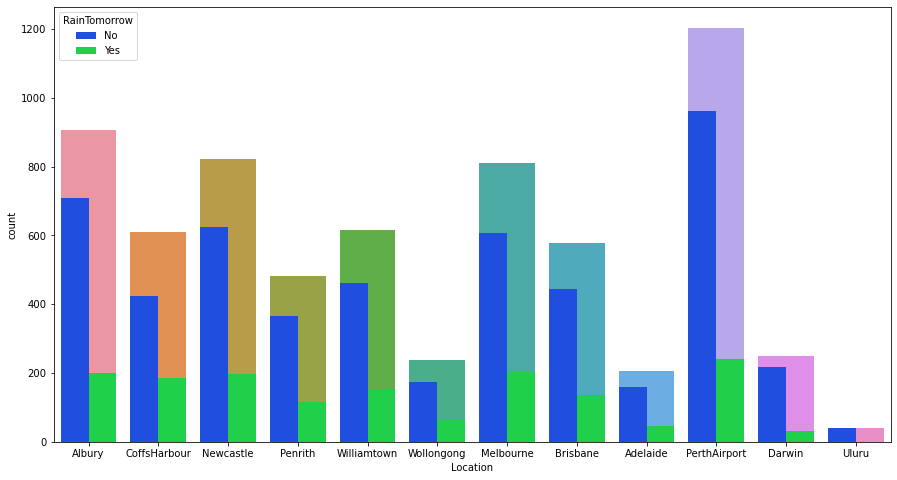

WindGustDir vs RainTomorrow column


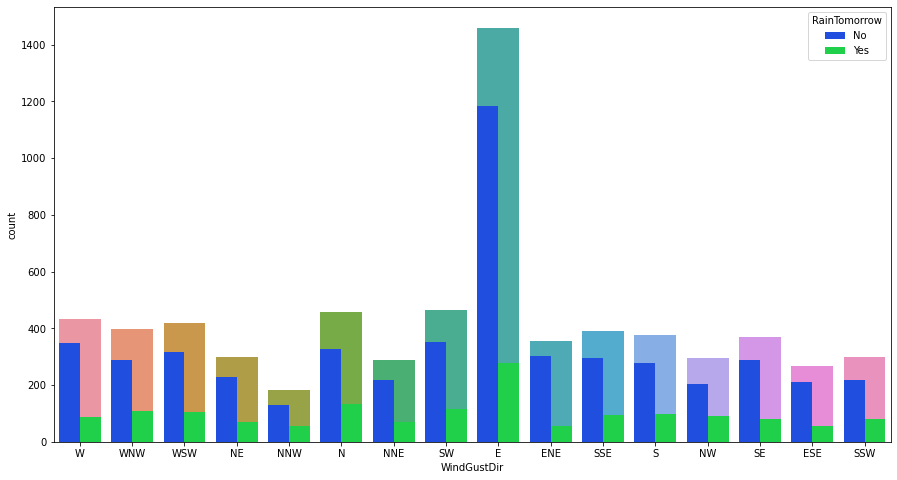

WindDir9am vs RainTomorrow column


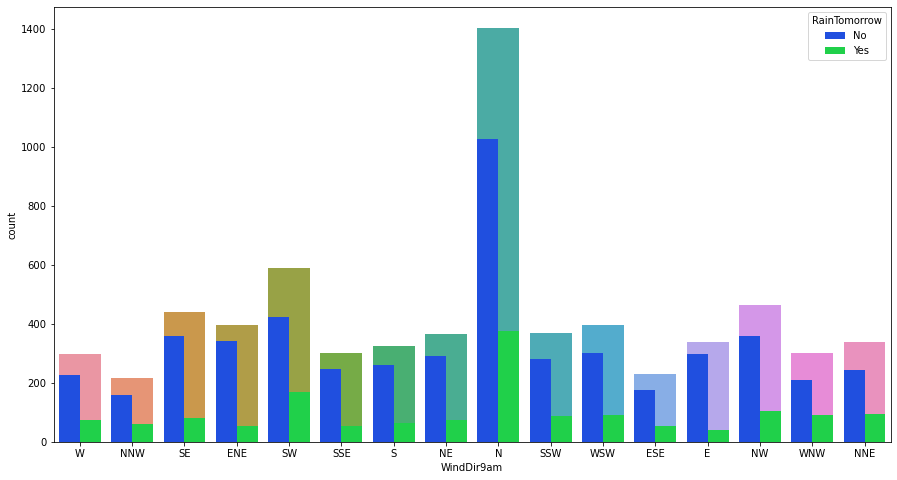

WindDir3pm vs RainTomorrow column


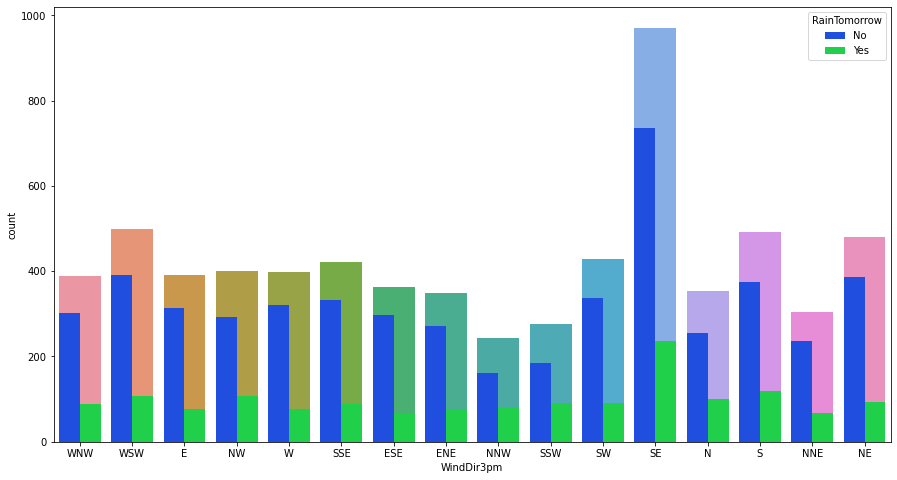

Month vs RainTomorrow column


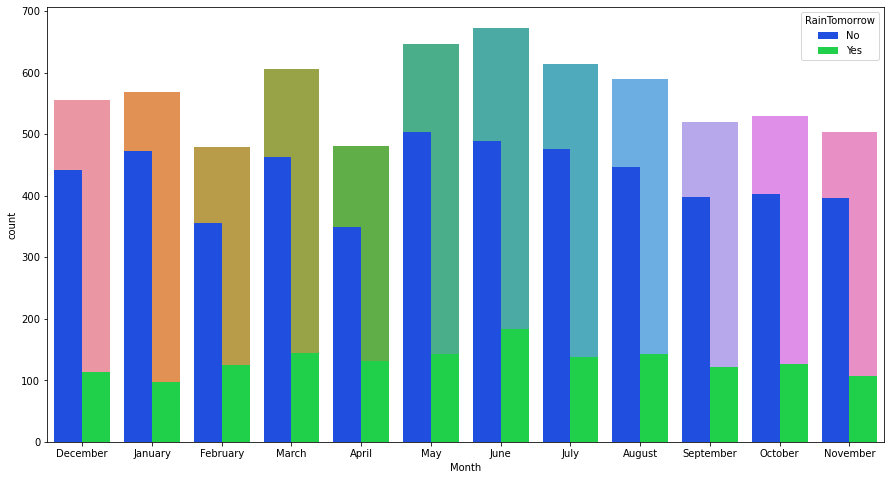

Location vs RainTomorrow column


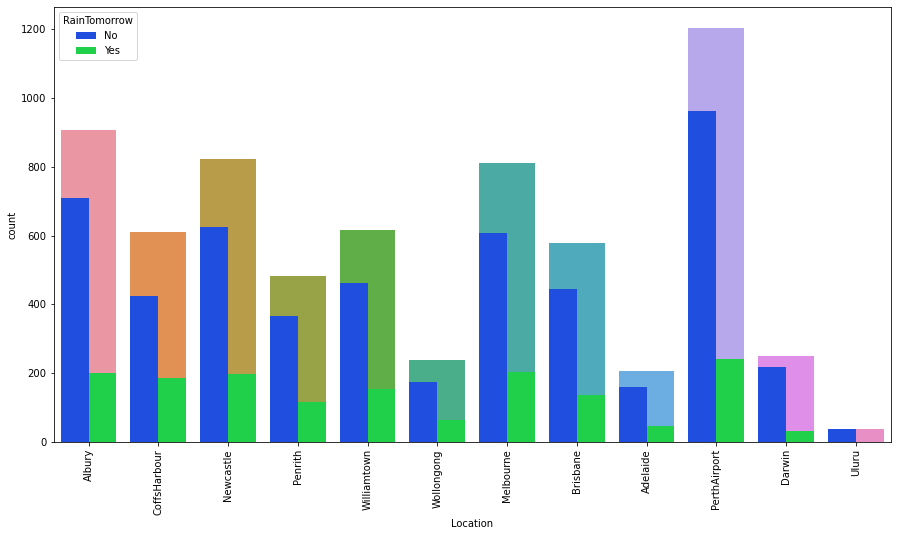

WindGustDir vs RainTomorrow column


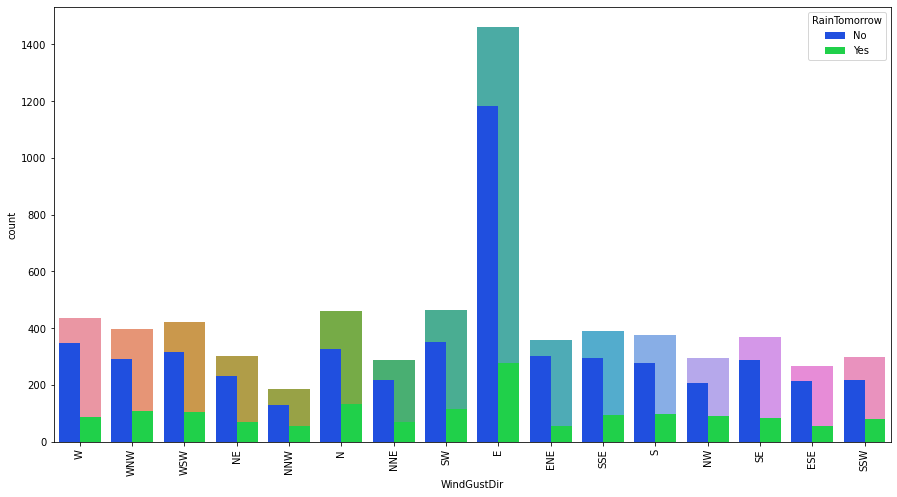

WindDir9am vs RainTomorrow column


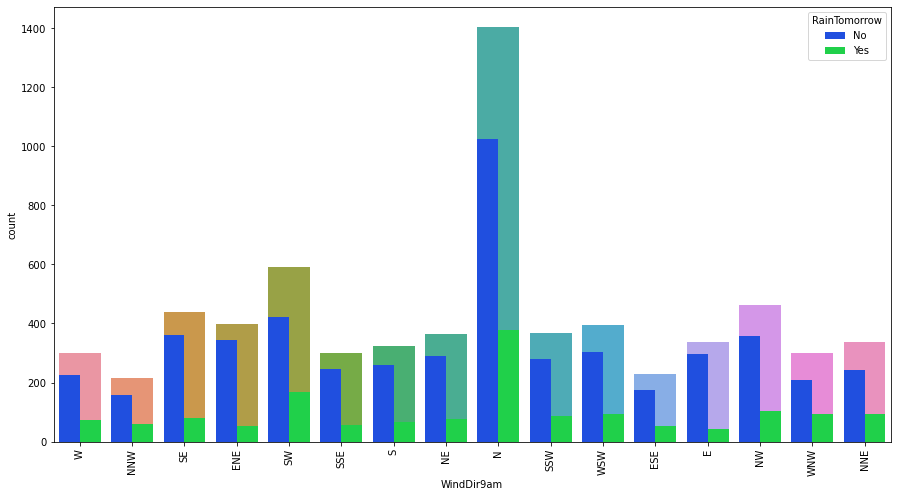

WindDir3pm vs RainTomorrow column


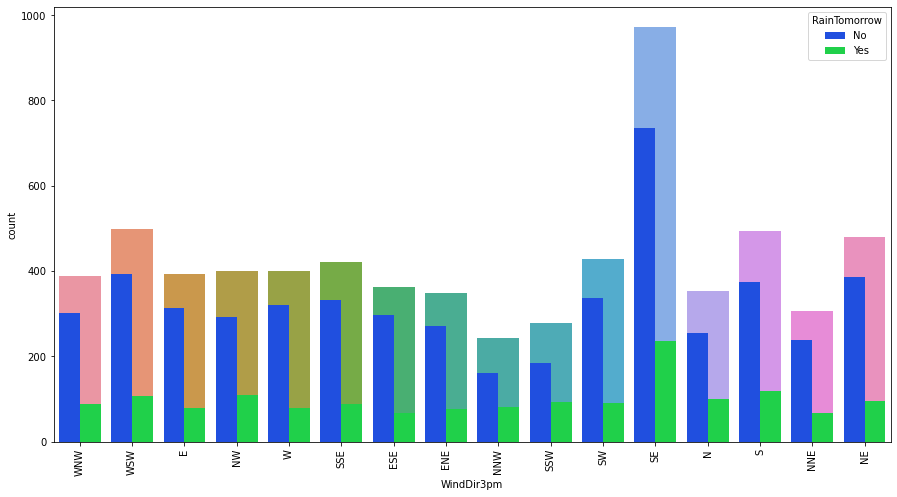

Month vs RainTomorrow column


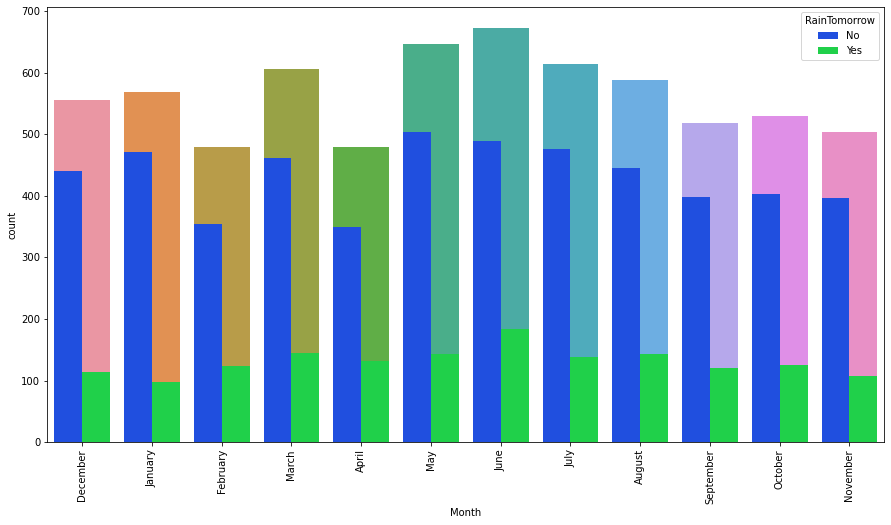

In [24]:
# plotting categorical features against classification target varible Raintomorrow
list2 = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'Month']
plt.style.use('seaborn-bright')



for m in df[list2]:
    plt.figure(figsize=(15,8))
    print(f"{m} vs RainTomorrow column")
    sns.countplot(df[m])
    sns.countplot(df[m], hue=df['RainTomorrow'])
    plt.show()
    
for n in df[list2]:
    plt.figure(figsize=(15,8))
    print(f"{n} vs RainTomorrow column")
    sns.countplot(df[n])
    sns.countplot(df[n], hue=df['RainTomorrow'])
    plt.xticks(rotation=90)
    plt.show()


From above graph we can see count plot of RainfallTomorrow when plotted against various features.

# Encoding categorical Data

In [25]:
# using Label encoder for classification target variable 'RainTomorrow'
le = LabelEncoder()
df["RainTomorrow"] = le.fit_transform(df["RainTomorrow"])
df.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month,Year,Day
0,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.320988,16.9,21.8,No,0,December,2008,1
1,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,4.336806,4.320988,17.2,24.3,No,0,December,2008,2
2,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,4.336806,2.000000,21.0,23.2,No,0,December,2008,3
3,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,4.336806,4.320988,18.1,26.5,No,0,December,2008,4
4,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,No,0,December,2008,5


In [26]:
# using ordinal encoder for categorical feature variable.
oe = OrdinalEncoder()
def ordinal_encode(df, column):
    df[column] = oe.fit_transform(df[column])
    return df

df=ordinal_encode(df, obj_d)
df.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month,Year,Day
0,1.0,13.4,22.9,0.6,13.0,44.0,13.0,14.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.320988,16.9,21.8,0.0,0.0,2.0,2008,1
1,1.0,7.4,25.1,0.0,14.0,44.0,6.0,15.0,4.0,22.0,44.0,25.0,1010.6,1007.8,4.336806,4.320988,17.2,24.3,0.0,0.0,2.0,2008,2
2,1.0,12.9,25.7,0.0,15.0,46.0,13.0,15.0,19.0,26.0,38.0,30.0,1007.6,1008.7,4.336806,2.000000,21.0,23.2,0.0,0.0,2.0,2008,3
3,1.0,9.2,28.0,0.0,4.0,24.0,9.0,0.0,11.0,9.0,45.0,16.0,1017.6,1012.8,4.336806,4.320988,18.1,26.5,0.0,0.0,2.0,2008,4
4,1.0,17.5,32.3,1.0,13.0,41.0,1.0,7.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0.0,0.0,2.0,2008,5


Hence we have converted all categorical data in numerical data

# Checking Correlation

In [27]:
df.corr()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month,Year,Day
Location,1.000000,0.090425,0.070878,-0.003504,-0.086385,0.260031,-0.088884,-0.001275,0.240594,0.229770,-0.033657,-0.001483,-0.037657,-0.024508,-0.008566,-0.010776,0.098533,0.066331,-0.004280,-0.004506,-0.039181,0.503047,-0.000710
MinTemp,0.090425,1.000000,0.728065,0.092371,-0.136250,0.242738,-0.020766,-0.139552,0.169397,0.188276,-0.154248,0.067683,-0.441253,-0.440363,0.095403,0.047495,0.891425,0.696419,0.075933,0.097146,-0.103650,0.032873,0.014344
MaxTemp,0.070878,0.728065,1.000000,-0.087657,-0.195924,0.165528,-0.192684,-0.160967,0.056377,0.115623,-0.424951,-0.430526,-0.337845,-0.413150,-0.245116,-0.241542,0.866584,0.974695,-0.225749,-0.160318,-0.075613,0.081622,0.016066
Rainfall,-0.003504,0.092371,-0.087657,1.000000,0.027810,0.089987,0.091662,0.032052,0.051829,0.022696,0.228654,0.243394,-0.073004,-0.034081,0.196189,0.162653,-0.004172,-0.091987,0.459163,0.224213,-0.009623,-0.006992,-0.008658
WindGustDir,-0.086385,-0.136250,-0.195924,0.027810,1.000000,0.010034,0.378772,0.455305,0.062552,0.131120,0.015327,0.025385,-0.101039,-0.024369,0.115171,0.078248,-0.153232,-0.209048,0.112410,0.045179,0.008020,-0.174132,0.013606
WindGustSpeed,0.260031,0.242738,0.165528,0.089987,0.010034,1.000000,-0.071934,0.078165,0.591784,0.620606,-0.268973,-0.095502,-0.394164,-0.363104,0.013532,0.058182,0.221725,0.129756,0.085806,0.184435,0.009028,-0.028152,-0.003225
WindDir9am,-0.088884,-0.020766,-0.192684,0.091662,0.378772,-0.071934,1.000000,0.216648,0.057311,0.045487,0.015585,0.126725,-0.027555,0.051694,0.079312,0.058119,-0.071087,-0.201267,0.157884,0.040399,0.023242,-0.062314,-0.014730
WindDir3pm,-0.001275,-0.139552,-0.160967,0.032052,0.455305,0.078165,0.216648,1.000000,0.010744,0.084885,-0.005578,-0.009618,-0.139023,-0.049330,0.070565,0.050584,-0.146456,-0.174885,0.094507,0.004301,0.010220,0.010694,0.001723
WindSpeed9am,0.240594,0.169397,0.056377,0.051829,0.062552,0.591784,0.057311,0.010744,1.000000,0.551348,-0.373061,-0.121519,-0.177664,-0.147296,-0.024997,0.022110,0.152106,0.041762,0.033367,0.057939,0.021557,-0.103663,-0.004444
WindSpeed3pm,0.229770,0.188276,0.115623,0.022696,0.131120,0.620606,0.045487,0.084885,0.551348,1.000000,-0.259812,-0.100704,-0.248316,-0.208384,-0.013567,-0.021128,0.207860,0.092975,0.011844,0.043409,0.029410,-0.076752,-0.011507


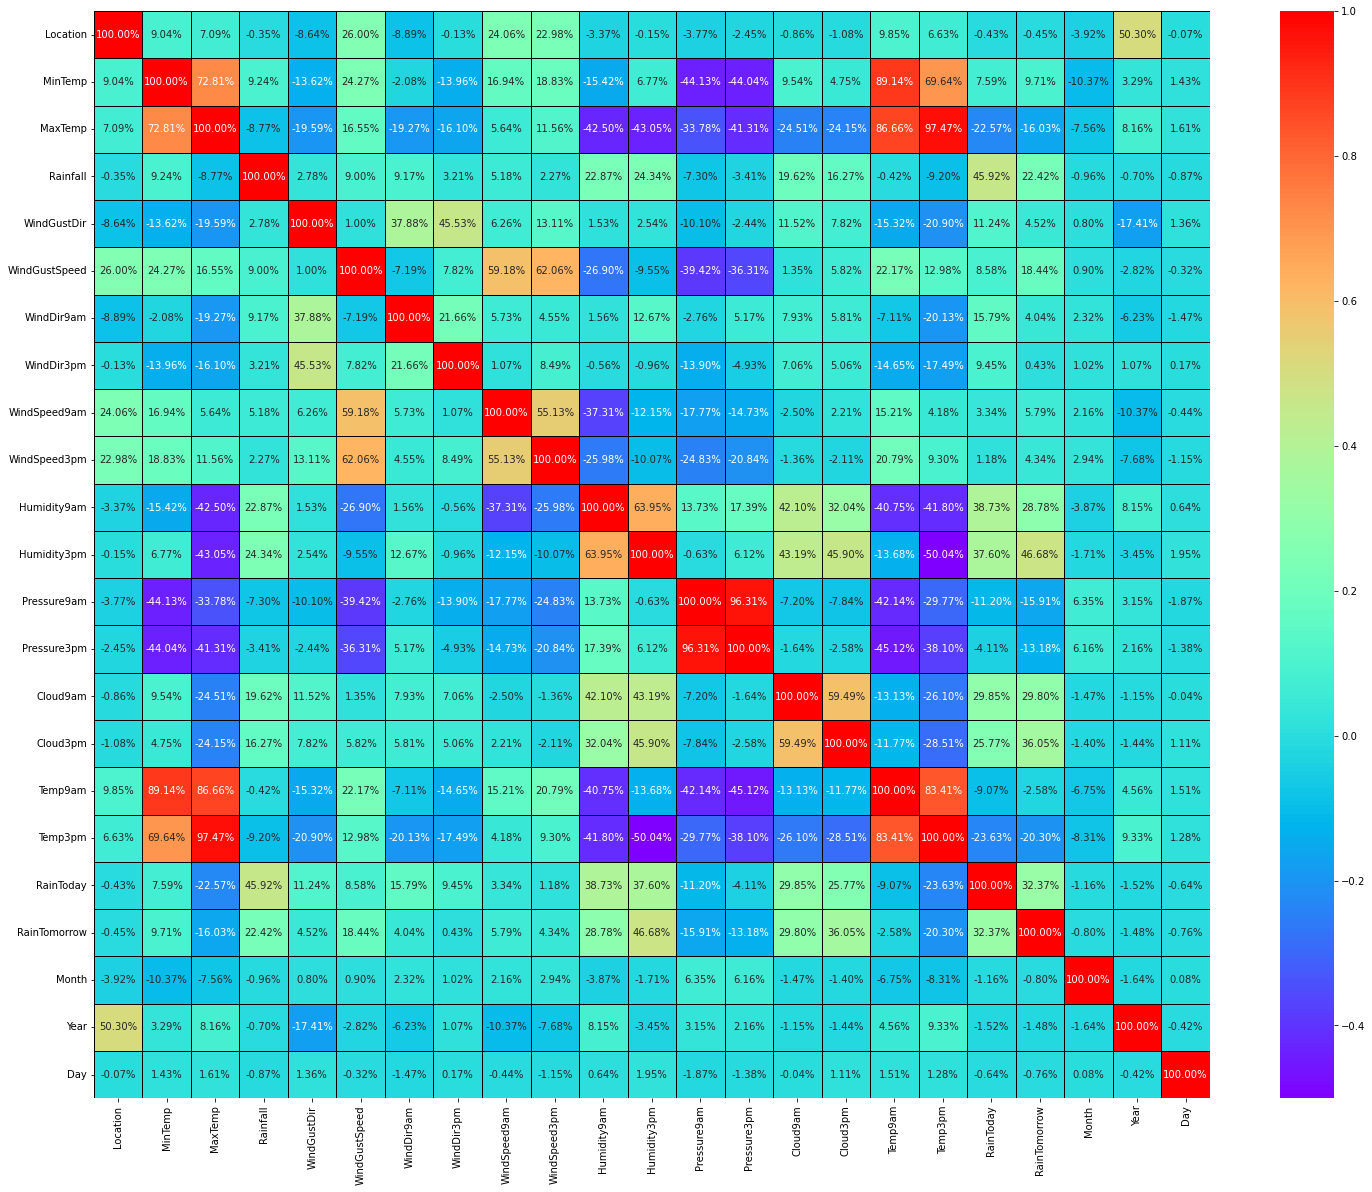

In [28]:
plt.figure(figsize=(25,20))
sns.heatmap(df.corr(), annot=True, fmt='.2%',cmap='rainbow',linewidth=0.5,linecolor='black')
plt.show()

**Observation 1: **<br>
Correlation with classification target variable 'RainTomorrow'<br>
Positive and highly correlated: Humidity3pm,Cloud3pm,Cloud9am, RainToday, Rainfall, humidity9am etc<br> 
Negative and least correlated : Year, Day, Month, WindDir3pm, Temp9am, Location etc<br>
    

**Observation 2: **<br>
Correlation with regression target variable 'Rainfall'<br>
Positive and highly correlated:RainToday, humidity9am, Humidity3pm, Cloud9am etc<br>
Negative and least correlated :Location,Year, Day, Month,Temp9am etc <br>
    


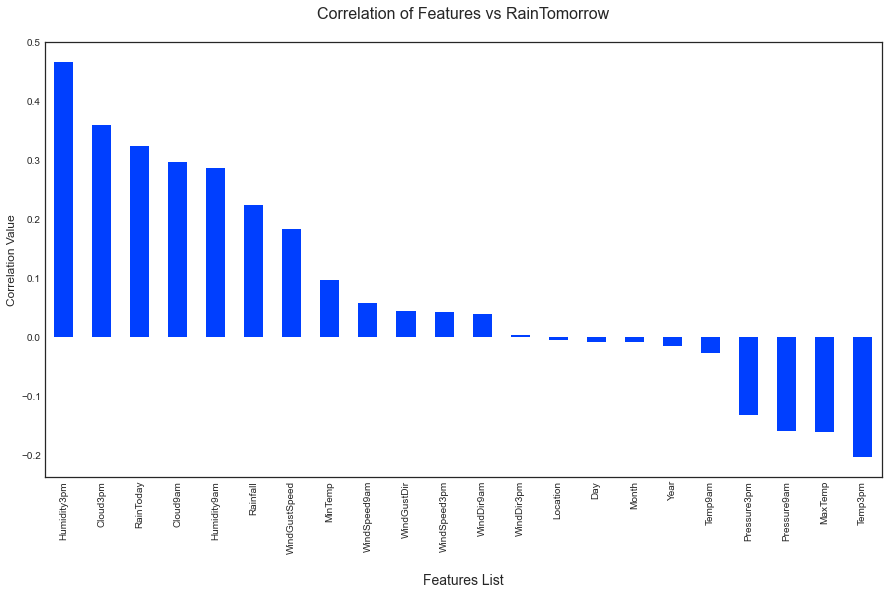

In [29]:
plt.style.use('seaborn-white')

df_corr = df.corr()
plt.figure(figsize=(15,8))
df_corr['RainTomorrow'].sort_values(ascending=False).drop('RainTomorrow').plot.bar()
plt.title("Correlation of Features vs RainTomorrow\n", fontsize=16)
plt.xlabel("\nFeatures List", fontsize=14)
plt.ylabel("Correlation Value", fontsize=12)
plt.show()

For classification target 'RainTomorrow' variable correlation bar graph is plotted above<br>


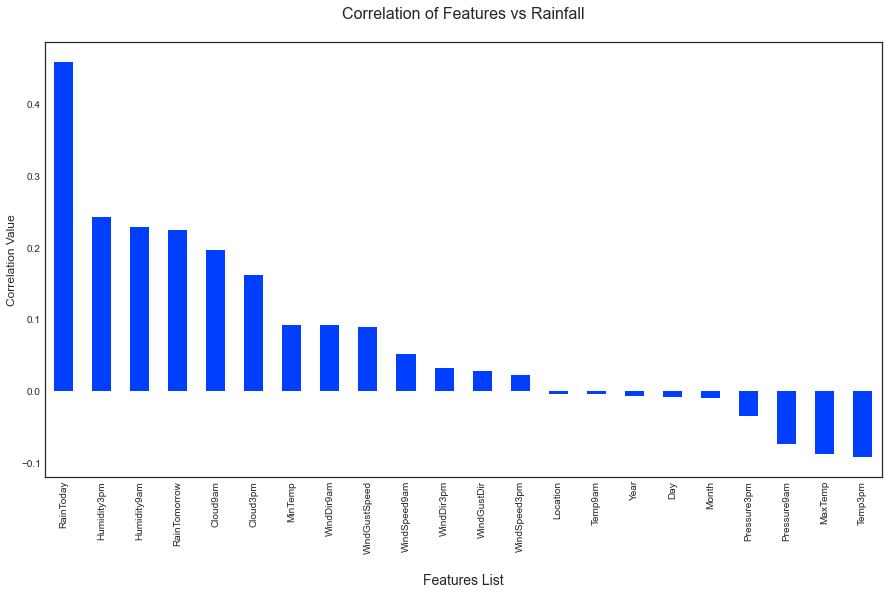

In [30]:
plt.style.use('seaborn-white')

df_corr = df.corr()
plt.figure(figsize=(15,8))
df_corr['Rainfall'].sort_values(ascending=False).drop('Rainfall').plot.bar()
plt.title("Correlation of Features vs Rainfall\n", fontsize=16)
plt.xlabel("\nFeatures List", fontsize=14)
plt.ylabel("Correlation Value", fontsize=12)
plt.show()

For regressopm target variable 'Rainfall' correlation bar graph is plotted above

# Checking Outliers

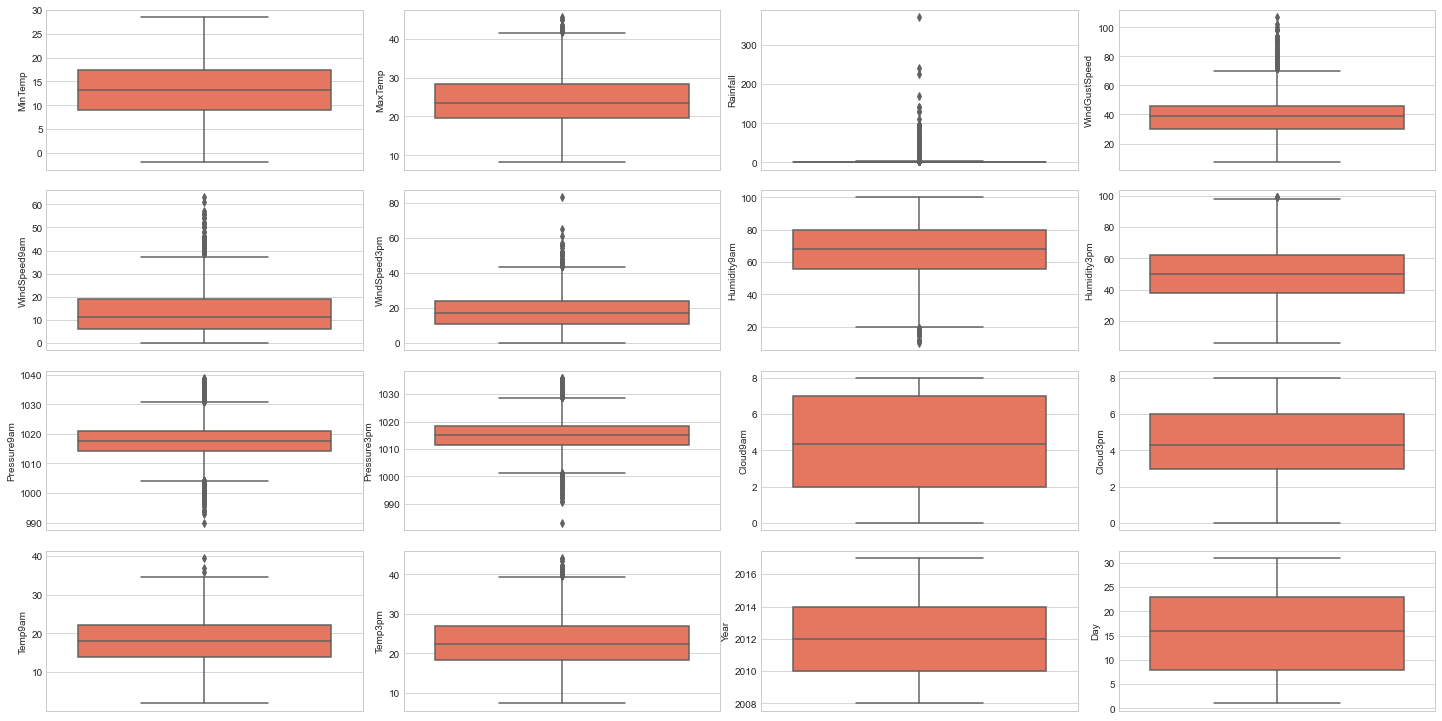

In [31]:
plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots(ncols=4, nrows=4, figsize=(20,10))
index =0

ax=ax.flatten()

for col, value in df[num_d].items():
    sns.boxplot(y =col, data= df, ax = ax[index], palette= "Reds")
    index+=1
plt.tight_layout(pad=0.6, w_pad=0.2, h_pad=2.0)
plt.show()

Outliers in our numerical unencoded data is plotted above with the  help of box plot.<br>
We see outliers in Rainfall, Pressure9am, MaxTemp, Windgustspeed, humidity9pm,, windspeed9am, indspeed3pm,humidity3pm, pressure3pm, Temp9am, Temp3pm have outliers

**Removing Outliers**

In [32]:
z = np.array(abs(zscore(df)))
threshold = 3
print(np.where(z>3))

(array([   8,   12,   12,   44,   44,   52,   52,   60,   60,   61,   61,
         62,   62,   62,   67,   68,   68,  123,  267,  271,  296,  381,
        381,  405,  406,  407,  431,  462,  466,  466,  563,  567,  568,
        568,  569,  602,  602,  603,  683,  683,  699,  713,  748,  748,
        770,  795,  796,  797,  802,  928,  928,  935,  949,  979,  980,
        980,  980, 1008, 1009, 1011, 1138, 1148, 1149, 1151, 1189, 1203,
       1237, 1241, 1264, 1265, 1357, 1411, 1412, 1413, 1479, 1480, 1481,
       1513, 1535, 1587, 1644, 1661, 1665, 1673, 1680, 1774, 1819, 1873,
       1898, 1903, 1945, 2016, 2028, 2043, 2074, 2108, 2116, 2186, 2201,
       2219, 2219, 2230, 2231, 2265, 2429, 2488, 2500, 2505, 2527, 2527,
       2541, 2593, 2676, 2677, 2735, 2849, 2859, 2890, 2898, 2900, 2900,
       2901, 2909, 3003, 3027, 3051, 3051, 3055, 3058, 3059, 3059, 3060,
       3066, 3067, 3067, 3067, 3068, 3070, 3082, 3082, 3082, 3089, 3089,
       3099, 3099, 3141, 3153, 3153, 3157, 3167, 3

In [33]:
df_new =df[(z<3).all(axis=1)]
df_new.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month,Year,Day
0,1.0,13.4,22.9,0.6,13.0,44.0,13.0,14.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.320988,16.9,21.8,0.0,0.0,2.0,2008,1
1,1.0,7.4,25.1,0.0,14.0,44.0,6.0,15.0,4.0,22.0,44.0,25.0,1010.6,1007.8,4.336806,4.320988,17.2,24.3,0.0,0.0,2.0,2008,2
2,1.0,12.9,25.7,0.0,15.0,46.0,13.0,15.0,19.0,26.0,38.0,30.0,1007.6,1008.7,4.336806,2.000000,21.0,23.2,0.0,0.0,2.0,2008,3
3,1.0,9.2,28.0,0.0,4.0,24.0,9.0,0.0,11.0,9.0,45.0,16.0,1017.6,1012.8,4.336806,4.320988,18.1,26.5,0.0,0.0,2.0,2008,4
4,1.0,17.5,32.3,1.0,13.0,41.0,1.0,7.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0.0,0.0,2.0,2008,5


In [34]:
print("Old dataframe shape :",df.shape)
print("New dataframe shape :", df_new.shape)


Old dataframe shape : (6762, 23)
New dataframe shape : (6460, 23)


In [35]:
dataloss = ((6762-6460)/6762)*100
print("Percentage data loss is :", dataloss)

Percentage data loss is : 4.466134279798876


Removing outliers have given 4% dataloss which is totally affordable

In [36]:
df =df_new.copy()            # uupdating our existing dataframe after removing outliers

In [37]:
df.shape                # checking the shape again

(6460, 23)

# Checking Skewness

In [38]:
df.skew().sort_values()

Humidity9am     -0.229874
Cloud9am        -0.204151
Cloud3pm        -0.146475
WindDir3pm      -0.128440
MinTemp         -0.083371
Temp9am         -0.075472
Month           -0.029663
Location        -0.001075
Day              0.004460
Pressure9am      0.059377
Pressure3pm      0.087611
WindGustDir      0.101237
Humidity3pm      0.160495
WindDir9am       0.209958
MaxTemp          0.263487
Temp3pm          0.286783
WindSpeed3pm     0.340302
Year             0.341624
WindGustSpeed    0.478698
WindSpeed9am     0.679941
RainTomorrow     1.331836
RainToday        1.337215
Rainfall         3.515053
dtype: float64

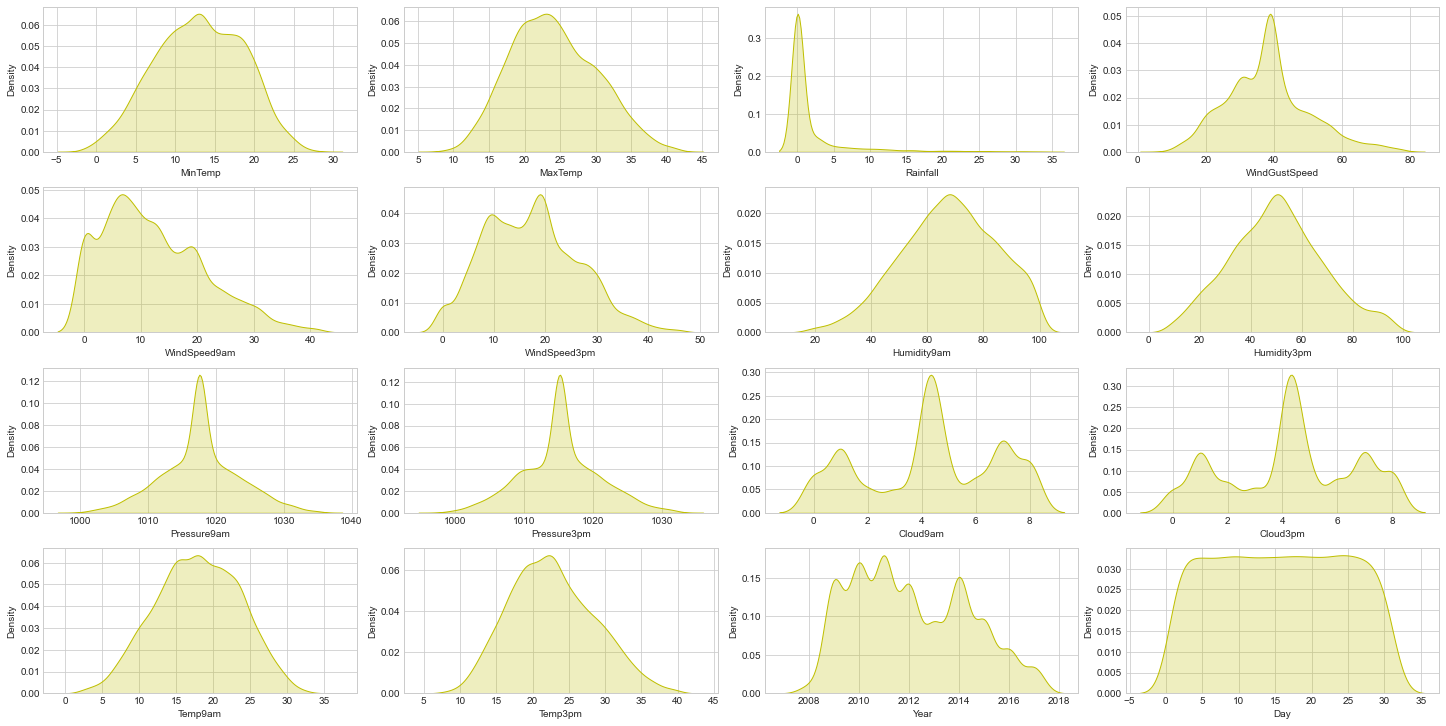

In [39]:
fig, ax = plt.subplots(ncols=4, nrows=4, figsize=(20,10))
index = 0
ax = ax.flatten()
for col, value in df[num_d].items():
    sns.distplot(value, ax=ax[index], hist=False, color="y", kde_kws={"shade": True})
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=1.0)
plt.show()

From above table and graph and ignoring the encoded columns of table skewness is present in RainToday and Rainfall.

# 1. Predicting the Classification Target Variable

# Splitting the Dataframe into Classification Target variable and Feature Variables

In [40]:
x= df.drop('RainTomorrow', axis=1)
y=df['RainTomorrow']

# Removing Skewness

In [41]:
from sklearn.preprocessing import PowerTransformer
power_t = PowerTransformer(method = 'yeo-johnson')
x = pd.DataFrame(power_t.fit_transform(x), columns=x.columns)
x.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Month,Year,Day
0,-1.453206,0.071870,-0.136228,0.690722,1.115091,0.535995,1.224608,1.326424,0.903523,0.777701,0.171621,-1.616707,-1.772369,-2.727818e-13,1.475981,0.031837,-0.170165,-0.092006,-0.53439,-1.033219,-5.719869e-13,-1.887158
1,-1.453206,-1.014914,0.227133,-0.673598,1.235281,0.535995,-0.078357,1.526729,-0.862728,0.580637,-1.374922,-1.427744,-1.252789,-2.486900e-13,0.029096,0.031837,-0.117410,0.328206,-0.53439,-1.033219,-5.719869e-13,-1.704374
2,-1.453206,-0.018051,0.323550,-0.673598,1.351389,0.686359,1.224608,1.526729,0.820823,0.970119,-1.689910,-1.122062,-1.790367,-2.178258e-13,0.029096,-0.977036,0.551970,0.146017,-0.53439,-1.033219,-5.719869e-13,-1.537675
3,-1.453206,-0.686902,0.683485,-0.673598,-0.275220,-1.191232,0.530473,-1.857893,0.064252,-0.866585,-1.321278,-2.010448,-0.017291,-7.882583e-14,0.029096,0.031837,0.040940,0.680982,-0.53439,-1.033219,-5.719869e-13,-1.381999
4,-1.453206,0.805809,1.320063,1.050712,1.115091,0.304403,-1.480097,-0.141910,-0.414728,0.378395,0.852086,-0.943407,-1.217125,-3.108069e-13,1.084935,1.580719,-0.011857,1.169627,-0.53439,-1.033219,-5.719869e-13,-1.234579


In [42]:
x.skew().sort_values()

WindDir3pm      -0.256991
WindGustDir     -0.254864
Cloud9am        -0.246799
Month           -0.217259
Day             -0.212435
Cloud3pm        -0.194704
Location        -0.189934
WindDir9am      -0.149614
WindSpeed9am    -0.131199
MinTemp         -0.114717
WindSpeed3pm    -0.077986
Humidity9am     -0.068841
Temp9am         -0.063422
Humidity3pm     -0.035954
MaxTemp         -0.017518
Temp3pm         -0.015723
Pressure9am     -0.001334
Year             0.000000
Pressure3pm      0.000000
WindGustSpeed    0.005411
Rainfall         0.974950
RainToday        1.337215
dtype: float64

We have manages to remove skewness

# Scaling the Data

In [43]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Month,Year,Day
0,-1.453206,0.071870,-0.136228,0.690722,1.115091,0.535995,1.224608,1.326424,0.903523,0.777701,0.171621,-1.616707,-1.772369,-1.446377,1.475981,0.031837,-0.170165,-0.092006,-0.53439,-1.033219,-1.778725,-1.887158
1,-1.453206,-1.014914,0.227133,-0.673598,1.235281,0.535995,-0.078357,1.526729,-0.862728,0.580637,-1.374922,-1.427744,-1.252790,-1.318615,0.029096,0.031837,-0.117410,0.328206,-0.53439,-1.033219,-1.778725,-1.704374
2,-1.453206,-0.018051,0.323550,-0.673598,1.351389,0.686359,1.224608,1.526729,0.820823,0.970119,-1.689910,-1.122062,-1.790367,-1.154940,0.029096,-0.977036,0.551970,0.146017,-0.53439,-1.033219,-1.778725,-1.537675
3,-1.453206,-0.686902,0.683485,-0.673598,-0.275220,-1.191232,0.530473,-1.857893,0.064252,-0.866585,-1.321278,-2.010448,-0.017291,-0.417811,0.029096,0.031837,0.040940,0.680982,-0.53439,-1.033219,-1.778725,-1.381999
4,-1.453206,0.805809,1.320063,1.050712,1.115091,0.304403,-1.480097,-0.141910,-0.414728,0.378395,0.852086,-0.943407,-1.217125,-1.648027,1.084935,1.580719,-0.011857,1.169627,-0.53439,-1.033219,-1.778725,-1.234579


# Principle Component Analysis

In [44]:
from sklearn.decomposition import PCA
pca = PCA(n_components=22, svd_solver="full")
x = pd.DataFrame(pca.fit_transform(x), columns=x.columns)
x.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Month,Year,Day
0,-0.578395,1.864991,2.143391,-2.668123,-0.104005,-0.684633,0.345333,2.365935,0.080051,0.552000,-0.751484,0.263764,1.023628,1.278407,0.060655,0.041457,0.756952,0.931599,0.126088,-0.388983,0.087492,-0.156615
1,-1.066530,-0.245497,1.941327,-2.849543,-0.600874,-1.169123,0.894215,2.164114,0.200699,1.353772,-0.258420,-0.022721,0.556439,-0.332155,0.694704,-0.318009,-0.472604,-0.297271,0.285430,-0.131933,-0.047410,0.084055
2,-2.048900,0.506229,2.975210,-2.938465,-0.300735,-0.286314,0.251910,1.972406,0.307342,0.002436,-0.160501,-0.353991,0.321064,0.619169,-0.079813,-0.183198,-0.431714,-0.113888,0.038673,-0.225357,0.370853,-0.047661
3,-1.067804,-1.962810,-0.234335,-2.160410,1.512520,0.110791,0.503588,1.816096,0.443216,-0.283941,-2.223402,0.948492,0.081549,0.259691,0.554939,-0.311178,0.253327,-0.121795,0.214489,-0.175112,-0.033647,-0.146543
4,-1.364024,1.857492,-0.781985,-2.222857,0.959056,-1.309958,0.672660,1.701962,0.332253,2.069083,-0.048229,1.405118,0.489743,-0.462819,0.418397,0.355688,0.989466,0.942389,0.575603,0.395881,-0.137076,-0.149027


# Checking Multicollinearity

In [45]:
def calc_vif(x):
    vif=pd.DataFrame()
    vif['variables']=x.columns
    vif["VIF FACTOR"]= [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif)

calc_vif(x)

,variables,VIF FACTOR
0,Location,1.0
1,MinTemp,1.0
2,MaxTemp,1.0
3,Rainfall,1.0
4,WindGustDir,1.0
5,WindGustSpeed,1.0
6,WindDir9am,1.0
7,WindDir3pm,1.0
8,WindSpeed9am,1.0
9,WindSpeed3pm,1.0


After PCA and Scaling the data our multicollinearity observed in correlation plot is removed.

# Balancing the Data using SMOTE

<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

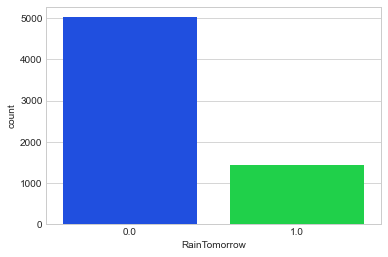

In [46]:
sns.countplot(y)

Thus above plot shows we have imbalnced data.

In [47]:
sm = SMOTE()
x,y = sm.fit_resample(x, y)

<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

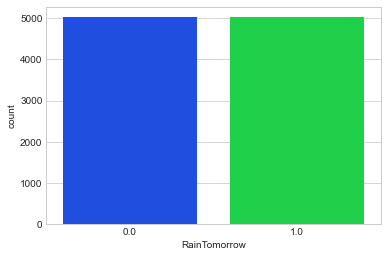

In [48]:
sns.countplot(y)

After using SMOTE data is now balanced

# Finding Best Random state for Classification Models

In [49]:
maxAccu=0
maxRS=0

for i in range(1, 1000):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    acc_score = (accuracy_score(y_test, pred))*100
    
    if acc_score>maxAccu:
        maxAccu=acc_score
        maxRS=i

print("Best accuracy score is", maxAccu,"on Random State", maxRS)

Best accuracy score is 80.99601593625498 on Random State 563


Best accuracy is at Random state : 563

In [57]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=563)

# Feature Importance

,Importance
Features,
MinTemp,0.214
Location,0.061
WindGustSpeed,0.055
Cloud3pm,0.047
MaxTemp,0.046
Pressure3pm,0.044
WindSpeed3pm,0.043
Rainfall,0.040
Humidity9am,0.038


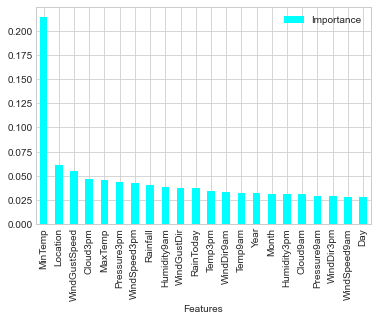

In [58]:
rf=RandomForestClassifier()
rf.fit(x_train, y_train)
importances = pd.DataFrame({'Features':x.columns, 'Importance':np.round(rf.feature_importances_,3)})
importances = importances.sort_values('Importance', ascending=False).set_index('Features')
importances.plot.bar(color='cyan')
importances

# Training the Classification Models

LogisticRegression()
Accuracy Score of LogisticRegression() is: 80.99601593625498
Cross Validation Score are : [0.75749129 0.67804878 0.75941423 0.62831241 0.73849372 0.84937238
 0.83193863]
Cross Validation Score: 84.93723849372385
Accuracy Score - CV_Score -3.941222557468876
[[1016  220]
 [ 257 1017]]
              precision    recall  f1-score   support

         0.0       0.80      0.82      0.81      1236
         1.0       0.82      0.80      0.81      1274

    accuracy                           0.81      2510
   macro avg       0.81      0.81      0.81      2510
weighted avg       0.81      0.81      0.81      2510

AUC Score of  LogisticRegression() is 0.810139813953961


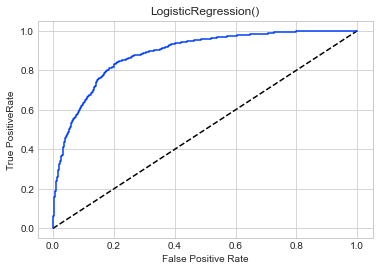



-------------------------------------------------------------------------------
GaussianNB()
Accuracy Score of GaussianNB() is: 77.92828685258965
Cross Validation Score are : [0.74843206 0.65714286 0.72803347 0.66178522 0.71129707 0.83054393
 0.82426778]
Cross Validation Score: 83.05439330543933
Accuracy Score - CV_Score -5.126106452849683
[[985 251]
 [303 971]]
              precision    recall  f1-score   support

         0.0       0.76      0.80      0.78      1236
         1.0       0.79      0.76      0.78      1274

    accuracy                           0.78      2510
   macro avg       0.78      0.78      0.78      2510
weighted avg       0.78      0.78      0.78      2510

AUC Score of  GaussianNB() is 0.779545985683295


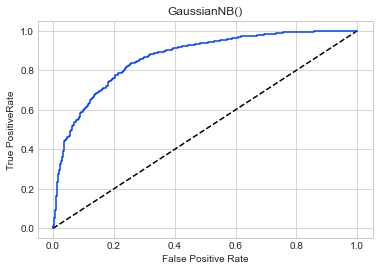



-------------------------------------------------------------------------------
DecisionTreeClassifier()
Accuracy Score of DecisionTreeClassifier() is: 80.79681274900399
Cross Validation Score are : [0.76724739 0.7261324  0.72036262 0.74198047 0.73849372 0.84170153
 0.81450488]
Cross Validation Score: 84.17015341701534
Accuracy Score - CV_Score -3.373340668011352
[[ 967  269]
 [ 213 1061]]
              precision    recall  f1-score   support

         0.0       0.82      0.78      0.80      1236
         1.0       0.80      0.83      0.81      1274

    accuracy                           0.81      2510
   macro avg       0.81      0.81      0.81      2510
weighted avg       0.81      0.81      0.81      2510

AUC Score of  DecisionTreeClassifier() is 0.8075862533213435


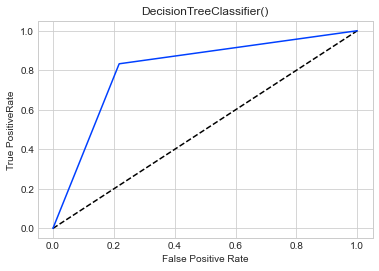



-------------------------------------------------------------------------------
KNeighborsClassifier()
Accuracy Score of KNeighborsClassifier() is: 85.33864541832669
Cross Validation Score are : [0.69268293 0.67804878 0.64923291 0.68967922 0.71199442 0.84937238
 0.84239888]
Cross Validation Score: 84.93723849372385
Accuracy Score - CV_Score 0.40140692460283844
[[ 932  304]
 [  64 1210]]
              precision    recall  f1-score   support

         0.0       0.94      0.75      0.84      1236
         1.0       0.80      0.95      0.87      1274

    accuracy                           0.85      2510
   macro avg       0.87      0.85      0.85      2510
weighted avg       0.87      0.85      0.85      2510

AUC Score of  KNeighborsClassifier() is 0.8519049143182292


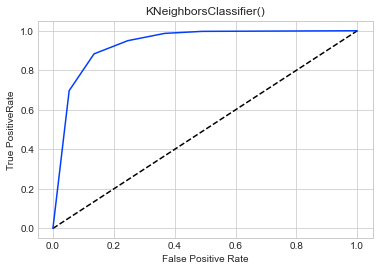



-------------------------------------------------------------------------------
RandomForestClassifier()
Accuracy Score of RandomForestClassifier() is: 89.12350597609561
Cross Validation Score are : [0.8543554  0.78118467 0.81241283 0.76569038 0.81311018 0.91701534
 0.89679219]
Cross Validation Score: 91.70153417015342
Accuracy Score - CV_Score -2.578028194057808
[[1096  140]
 [ 133 1141]]
              precision    recall  f1-score   support

         0.0       0.89      0.89      0.89      1236
         1.0       0.89      0.90      0.89      1274

    accuracy                           0.89      2510
   macro avg       0.89      0.89      0.89      2510
weighted avg       0.89      0.89      0.89      2510

AUC Score of  RandomForestClassifier() is 0.891167893595078


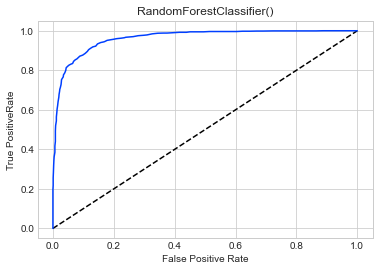



-------------------------------------------------------------------------------
SVC(kernel='poly', probability=True)
Accuracy Score of SVC(kernel='poly', probability=True) is: 83.54581673306772
Cross Validation Score are : [0.73310105 0.67595819 0.73500697 0.65829847 0.74616457 0.85495119
 0.81729428]
Cross Validation Score: 85.49511854951184
Accuracy Score - CV_Score -1.9493018164441196
[[1060  176]
 [ 237 1037]]
              precision    recall  f1-score   support

         0.0       0.82      0.86      0.84      1236
         1.0       0.85      0.81      0.83      1274

    accuracy                           0.84      2510
   macro avg       0.84      0.84      0.84      2510
weighted avg       0.84      0.84      0.84      2510

AUC Score of  SVC(kernel='poly', probability=True) is 0.8357884602683492


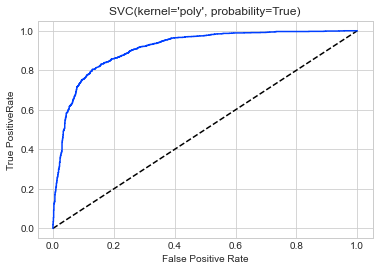



-------------------------------------------------------------------------------
ExtraTreesClassifier()
Accuracy Score of ExtraTreesClassifier() is: 91.55378486055777
Cross Validation Score are : [0.87526132 0.80278746 0.85146444 0.79916318 0.84588563 0.93514644
 0.93165969]
Cross Validation Score: 93.51464435146444
Accuracy Score - CV_Score -1.960859490906671
[[1123  113]
 [  99 1175]]
              precision    recall  f1-score   support

         0.0       0.92      0.91      0.91      1236
         1.0       0.91      0.92      0.92      1274

    accuracy                           0.92      2510
   macro avg       0.92      0.92      0.92      2510
weighted avg       0.92      0.92      0.92      2510

AUC Score of  ExtraTreesClassifier() is 0.9154340227502502


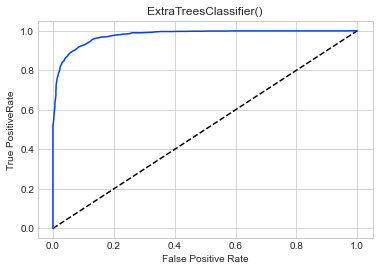



-------------------------------------------------------------------------------
XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accuracy Score of XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=F

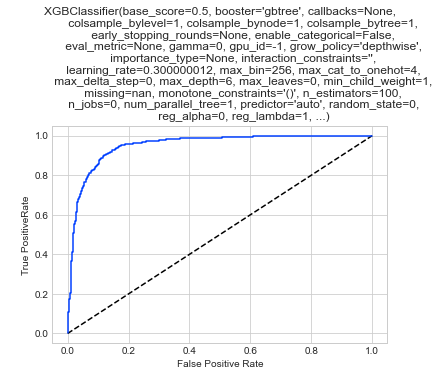



-------------------------------------------------------------------------------
LGBMClassifier()
Accuracy Score of LGBMClassifier() is: 86.97211155378486
Cross Validation Score are : [0.78118467 0.68780488 0.73640167 0.69665272 0.77963738 0.88075314
 0.88423989]
Cross Validation Score: 88.42398884239888
Accuracy Score - CV_Score -1.4518772886140283
[[1061  175]
 [ 152 1122]]
              precision    recall  f1-score   support

         0.0       0.87      0.86      0.87      1236
         1.0       0.87      0.88      0.87      1274

    accuracy                           0.87      2510
   macro avg       0.87      0.87      0.87      2510
weighted avg       0.87      0.87      0.87      2510

AUC Score of  LGBMClassifier() is 0.8695524886578978


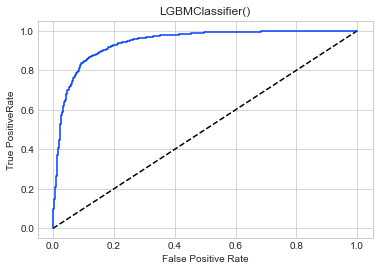



-------------------------------------------------------------------------------


In [59]:
lg=LogisticRegression()
gnb=GaussianNB()
svc=SVC(probability=True,kernel ='poly')
dtc =DecisionTreeClassifier()
knn= KNeighborsClassifier()
rfc= RandomForestClassifier()
etc = ExtraTreesClassifier()
xg= xgb.XGBClassifier(verbosity = 0)
LGBM = lgb.LGBMClassifier()

model=[lg,gnb,dtc,knn,rfc,svc,etc,xg,LGBM]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    
    #Calculating cross validation score
    for i in range(2,8):
        cvs=cross_val_score(m,x,y,cv=i)
    
    a = max(cvs)
    cv_score=(a.mean())*100      # taking max value of cvs and calculating mean of it    
# taking max value because I am assuming that accuracy score of all models to be approx 100 %
    
    
    y_pred_prob = m.predict_proba(x_test)[:,-1]
    fpr,tpr,thresholds = roc_curve(y_test, y_pred_prob)
    auc_score = roc_auc_score(y_test, m.predict(x_test))
    print(m)
    print('Accuracy Score of',m,'is:',accuracy_score(y_test,predm)*100)
    print("Cross Validation Score are :", cvs)
    print("Cross Validation Score:", cv_score)
    print("Accuracy Score - CV_Score", (accuracy_score(y_test,predm)*100)-(cv_score))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print("AUC Score of ",m,"is",auc_score)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr,tpr,label=m)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True PositiveRate")
    plt.title(m)
    plt.show()
    print('\n')
    print('-------------------------------------------------------------------------------')

Lets prepare a performance table

In [60]:
Performance_table = pd.DataFrame({"Model":['LR','GNB','DTC','KNC','RFC','SVC','ETC','XGB','LGBM'],
                                 "Accuracy_score":[80.99,77.92,80.79,85.33,89.12,83.54,91.55,88.88,86.97],
                                 "Cv Score":[84.93,83.05,84.17,84.93,91.70,85.49,93.51,89.26,88.42],
                                 "Result":[-3.94,-5.12,-3.37,0.40,-2.57,-1.94,-1.96,-0.37,-1.45],
                                 "AUC Score":[0.81,0.77,0.80,0.85,0.89,0.83,0.91,0.88,0.86]})

Performance_table

,Model,Accuracy_score,Cv Score,Result,AUC Score
0,LR,80.99,84.93,-3.94,0.81
1,GNB,77.92,83.05,-5.12,0.77
2,DTC,80.79,84.17,-3.37,0.80
3,KNC,85.33,84.93,0.40,0.85
4,RFC,89.12,91.70,-2.57,0.89
5,SVC,83.54,85.49,-1.94,0.83
6,ETC,91.55,93.51,-1.96,0.91
7,XGB,88.88,89.26,-0.37,0.88
8,LGBM,86.97,88.42,-1.45,0.86


From above table it is clear that ExtraTreesClassifier is giving best scores So I chose ETC

# HyperTuning

In [61]:
# choosing Extra trees classifier

param = {'criterion' : ['gini', 'entropy'],
              'n_jobs' : [-2, -1, 1],
              'random_state' : [42, 213, 1000],
              'max_depth' : [30, 40, 50],
              'n_estimators' : [300, 500, 700]
             }

In [62]:
GCV = GridSearchCV(ExtraTreesClassifier(), param, cv=7)

In [63]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=7, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [30, 40, 50],
                         'n_estimators': [300, 500, 700], 'n_jobs': [-2, -1, 1],
                         'random_state': [42, 213, 1000]})

In [64]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 40,
 'n_estimators': 300,
 'n_jobs': -2,
 'random_state': 213}

In [65]:
GCV.best_score_

0.9053136385530264

# Final Classification Model

In [66]:
final_model = ExtraTreesClassifier(criterion= 'gini',max_depth =40,n_estimators=300, n_jobs=-2, random_state=213)

Classifier = final_model.fit(x_train, y_train)
fmod_pred = final_model.predict(x_test)
fmod_acc = (accuracy_score(y_test, fmod_pred))*100
print("Accuracy score for the Best Model is:", fmod_acc)

Accuracy score for the Best Model is: 92.23107569721115


Our final accuracy score is 92%

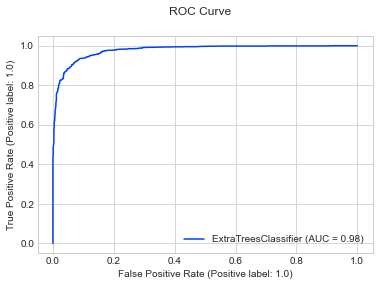

In [67]:
# visualization of final model
roc = metrics.plot_roc_curve(final_model, x_test, y_test)
roc.figure_.suptitle("ROC Curve")
plt.show()

AUC score is 0.98

# Confusion Matrix

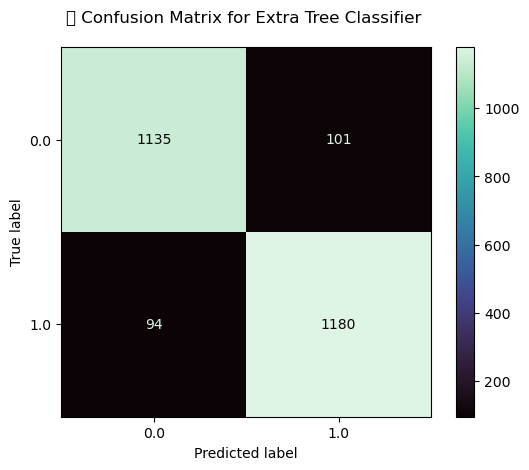

In [68]:
plt.style.use('default')

class_names = df.columns
metrics.plot_confusion_matrix(Classifier, x_test, y_test, cmap='mako')
plt.title('\t Confusion Matrix for Extra Tree Classifier \n')
plt.show()


Our model is performing good which can be seen from confusion matrix.<br>
Black box depicts no. of times model has predicted wrong output.<br>
Green box depucts no . of times model has predicted correct output..<br>

# Saving the Classification model

In [69]:
filename = "RainfallClassification_E08.pkl"
joblib.dump(final_model, filename)

['RainfallClassification_E08.pkl']

# 2. Predicting the Regression Target Variable

# Splitting the dataframe in Regression target variable and Feature Variables

In [70]:
x= df.drop('Rainfall', axis=1)
y=df['Rainfall']

In [71]:
x.head()

,Location,MinTemp,MaxTemp,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month,Year,Day
0,1.0,13.4,22.9,13.0,44.0,13.0,14.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.320988,16.9,21.8,0.0,0.0,2.0,2008,1
1,1.0,7.4,25.1,14.0,44.0,6.0,15.0,4.0,22.0,44.0,25.0,1010.6,1007.8,4.336806,4.320988,17.2,24.3,0.0,0.0,2.0,2008,2
2,1.0,12.9,25.7,15.0,46.0,13.0,15.0,19.0,26.0,38.0,30.0,1007.6,1008.7,4.336806,2.000000,21.0,23.2,0.0,0.0,2.0,2008,3
3,1.0,9.2,28.0,4.0,24.0,9.0,0.0,11.0,9.0,45.0,16.0,1017.6,1012.8,4.336806,4.320988,18.1,26.5,0.0,0.0,2.0,2008,4
4,1.0,17.5,32.3,13.0,41.0,1.0,7.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0.0,0.0,2.0,2008,5


# Removing Skewness

In [72]:
from sklearn.preprocessing import PowerTransformer
power_t = PowerTransformer(method = 'yeo-johnson')
x = pd.DataFrame(power_t.fit_transform(x), columns=x.columns)
x.head()

,Location,MinTemp,MaxTemp,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month,Year,Day
0,-1.453206,0.071870,-0.136228,1.115091,0.535995,1.224608,1.326424,0.903523,0.777701,0.171621,-1.616707,-1.772369,-2.727818e-13,1.475981,0.031837,-0.170165,-0.092006,-0.53439,-0.535586,-1.033219,-5.719869e-13,-1.887158
1,-1.453206,-1.014914,0.227133,1.235281,0.535995,-0.078357,1.526729,-0.862728,0.580637,-1.374922,-1.427744,-1.252789,-2.486900e-13,0.029096,0.031837,-0.117410,0.328206,-0.53439,-0.535586,-1.033219,-5.719869e-13,-1.704374
2,-1.453206,-0.018051,0.323550,1.351389,0.686359,1.224608,1.526729,0.820823,0.970119,-1.689910,-1.122062,-1.790367,-2.178258e-13,0.029096,-0.977036,0.551970,0.146017,-0.53439,-0.535586,-1.033219,-5.719869e-13,-1.537675
3,-1.453206,-0.686902,0.683485,-0.275220,-1.191232,0.530473,-1.857893,0.064252,-0.866585,-1.321278,-2.010448,-0.017291,-7.882583e-14,0.029096,0.031837,0.040940,0.680982,-0.53439,-0.535586,-1.033219,-5.719869e-13,-1.381999
4,-1.453206,0.805809,1.320063,1.115091,0.304403,-1.480097,-0.141910,-0.414728,0.378395,0.852086,-0.943407,-1.217125,-3.108069e-13,1.084935,1.580719,-0.011857,1.169627,-0.53439,-0.535586,-1.033219,-5.719869e-13,-1.234579


In [73]:
x.skew().sort_values()

WindDir3pm      -0.256991
WindGustDir     -0.254864
Cloud9am        -0.246799
Month           -0.217259
Day             -0.212435
Cloud3pm        -0.194704
Location        -0.189934
WindDir9am      -0.149614
WindSpeed9am    -0.131199
MinTemp         -0.114717
WindSpeed3pm    -0.077986
Humidity9am     -0.068841
Temp9am         -0.063422
Humidity3pm     -0.035954
MaxTemp         -0.017518
Temp3pm         -0.015723
Pressure9am     -0.001334
Year             0.000000
Pressure3pm      0.000000
WindGustSpeed    0.005411
RainTomorrow     1.331836
RainToday        1.337215
dtype: float64

Ignore the encoded features columns, we have managed to remove all skewness 

# Scaling the Data

In [74]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x.head()

,Location,MinTemp,MaxTemp,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month,Year,Day
0,-1.453206,0.071870,-0.136228,1.115091,0.535995,1.224608,1.326424,0.903523,0.777701,0.171621,-1.616707,-1.772369,-1.446377,1.475981,0.031837,-0.170165,-0.092006,-0.53439,-0.535586,-1.033219,-1.778725,-1.887158
1,-1.453206,-1.014914,0.227133,1.235281,0.535995,-0.078357,1.526729,-0.862728,0.580637,-1.374922,-1.427744,-1.252790,-1.318615,0.029096,0.031837,-0.117410,0.328206,-0.53439,-0.535586,-1.033219,-1.778725,-1.704374
2,-1.453206,-0.018051,0.323550,1.351389,0.686359,1.224608,1.526729,0.820823,0.970119,-1.689910,-1.122062,-1.790367,-1.154940,0.029096,-0.977036,0.551970,0.146017,-0.53439,-0.535586,-1.033219,-1.778725,-1.537675
3,-1.453206,-0.686902,0.683485,-0.275220,-1.191232,0.530473,-1.857893,0.064252,-0.866585,-1.321278,-2.010448,-0.017291,-0.417811,0.029096,0.031837,0.040940,0.680982,-0.53439,-0.535586,-1.033219,-1.778725,-1.381999
4,-1.453206,0.805809,1.320063,1.115091,0.304403,-1.480097,-0.141910,-0.414728,0.378395,0.852086,-0.943407,-1.217125,-1.648027,1.084935,1.580719,-0.011857,1.169627,-0.53439,-0.535586,-1.033219,-1.778725,-1.234579


# Principle Component Analysis(PCA)

In [75]:
from sklearn.decomposition import PCA
pca = PCA(n_components=22, svd_solver="full")
x = pd.DataFrame(pca.fit_transform(x), columns=x.columns)
x.head()

,Location,MinTemp,MaxTemp,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month,Year,Day
0,-0.779156,1.454277,2.246402,-2.712459,-0.205648,0.625028,2.146427,0.616949,-1.437086,-0.301273,-0.925343,-0.088740,-0.161722,0.789527,1.215111,0.134518,-0.338082,-0.744329,0.491483,-0.385066,0.113014,-0.153273
1,-1.002607,-0.186040,1.940868,-2.814712,-0.502773,1.491018,1.941554,0.677756,-1.477432,0.596337,0.135242,-0.271761,-0.026381,0.583426,-0.349056,0.658968,0.487109,0.316713,-0.410405,-0.129997,-0.049972,0.082849
2,-2.022368,0.483418,2.989949,-2.917413,-0.226451,0.412145,1.862589,0.608236,-0.389871,-0.208959,-0.031696,-0.093424,-0.445292,0.210768,0.601824,-0.038821,0.342116,0.316732,-0.110371,-0.221738,0.368315,-0.046656
3,-0.947512,-1.965943,-0.235994,-2.134475,1.644542,0.341518,1.684076,0.756212,-0.594905,-1.295587,-0.753503,-1.417841,1.087472,0.135324,0.225610,0.570131,0.321133,-0.428916,-0.215245,-0.177745,-0.025629,-0.144451
4,-1.612096,1.326852,-0.675153,-2.265839,0.782992,1.188295,1.328454,0.952106,-2.460140,0.881633,-0.714617,0.620173,1.010129,0.539730,-0.477045,0.362374,-0.859396,-0.744072,0.133380,0.405641,-0.114028,-0.150234


# Checking Multicollinearity

In [76]:
def calc_vif(x):
    vif=pd.DataFrame()
    vif['variables']=x.columns
    vif["VIF FACTOR"]= [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif)

calc_vif(x)

,variables,VIF FACTOR
0,Location,1.0
1,MinTemp,1.0
2,MaxTemp,1.0
3,WindGustDir,1.0
4,WindGustSpeed,1.0
5,WindDir9am,1.0
6,WindDir3pm,1.0
7,WindSpeed9am,1.0
8,WindSpeed3pm,1.0
9,Humidity9am,1.0


After PCA and Scaling the data our multicollinearity observed in correlation plot is removed.

# Finding Best Random State For Regression Models

In [77]:
max_Accu=0
max_RS=0

for i in range(1, 1000):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=i)
    lr=LinearRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    r2 = r2_score(y_test, pred)
    
    if r2>max_Accu:
        max_Accu=r2
        max_RS=i

print("Best r2 score is", max_Accu,"on Random State", max_RS)

Best r2 score is 0.5457269561244997 on Random State 458


In [78]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=458)

# Feature Importance

,Importance
Features,
MinTemp,0.225
WindSpeed3pm,0.153
Humidity3pm,0.145
Humidity9am,0.062
WindGustDir,0.028
WindDir9am,0.028
Month,0.027
MaxTemp,0.026
Location,0.024


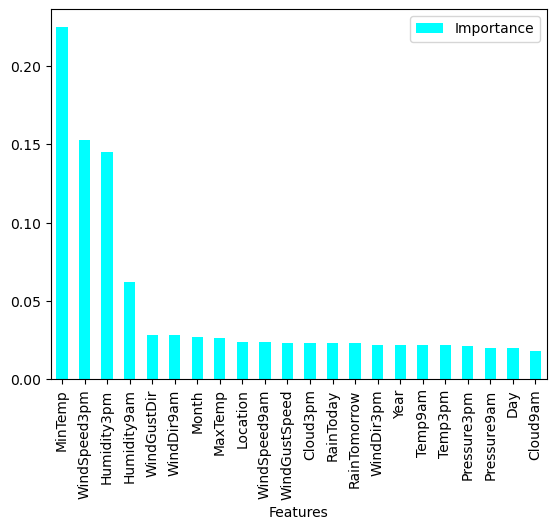

In [79]:
rf=RandomForestRegressor()
rf.fit(x_train, y_train)
importances = pd.DataFrame({'Features':x.columns, 'Importance':np.round(rf.feature_importances_,3)})
importances = importances.sort_values('Importance', ascending=False).set_index('Features')
importances.plot.bar(color='cyan')
importances

# Training Regression Models



****************** LinearRegression() *******************


The training accuracy of is 0.4867161852781863
The test accuracy of is 0.5457269561244997
R2 Score is: 54.57269561244998
Cross Validation Scores [0.50594194 0.50087318 0.45185673 0.4947687  0.4112112  0.56379035
 0.52115113]
Maximum of cvs: 0.5637903495240636
Cross Validation Score: 56.37903495240636
R2 Score - Cross Validation Score is -1.8063393399563807
Error Calculations:
Mean absolute error : 1.4796310697446424
Mean squared error :  8.590379613173571
Root mean squared error: 2.9309349384067827


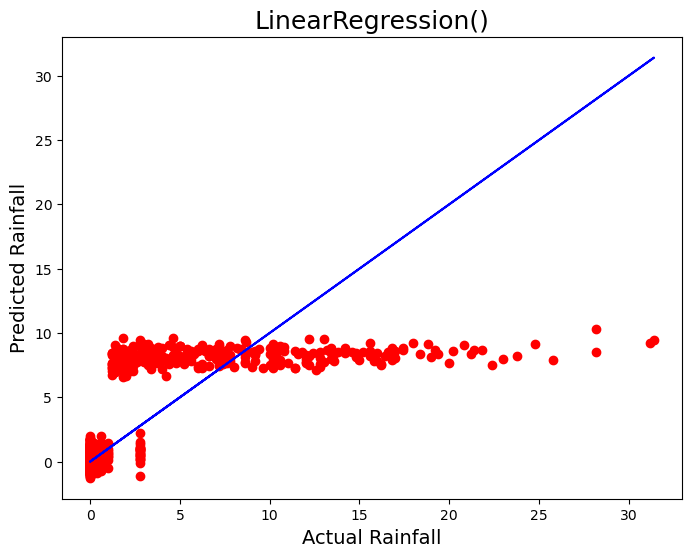



****************** SVR() *******************


The training accuracy of is 0.4348820084160636
The test accuracy of is 0.4777007131194978
R2 Score is: 47.77007131194978
Cross Validation Scores [0.3899842  0.4284001  0.40685446 0.34867611 0.37402846 0.46170569
 0.43255112]
Maximum of cvs: 0.46170569459907096
Cross Validation Score: 46.1705694599071
R2 Score - Cross Validation Score is 1.5995018520426783
Error Calculations:
Mean absolute error : 1.1895957069179195
Mean squared error :  9.87676730214046
Root mean squared error: 3.142732457932183


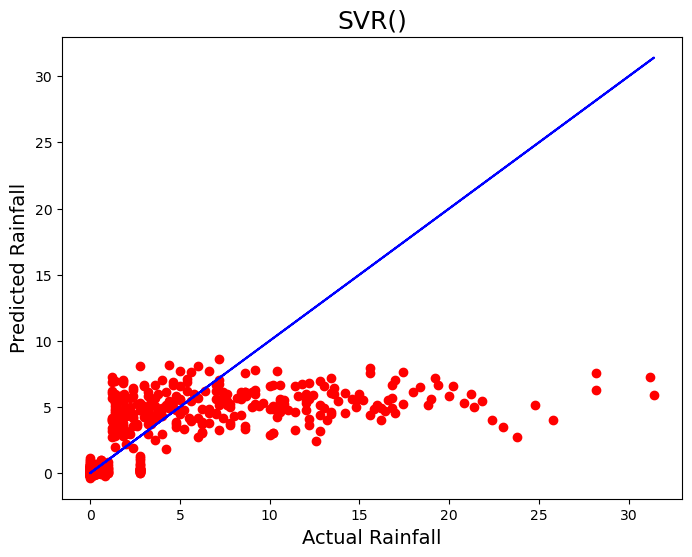



****************** DecisionTreeRegressor() *******************


The training accuracy of is 1.0
The test accuracy of is -0.07370371878144955
R2 Score is: -7.3703718781449545
Cross Validation Scores [-0.07461893 -0.1047638  -0.09748292 -0.55063288  0.05332181 -0.07956121
  0.22843046]
Maximum of cvs: 0.22843045994330757
Cross Validation Score: 22.843045994330758
R2 Score - Cross Validation Score is -30.213417872475713
Error Calculations:
Mean absolute error : 1.776739242607799
Mean squared error :  20.303917788563844
Root mean squared error: 4.5059868828663765


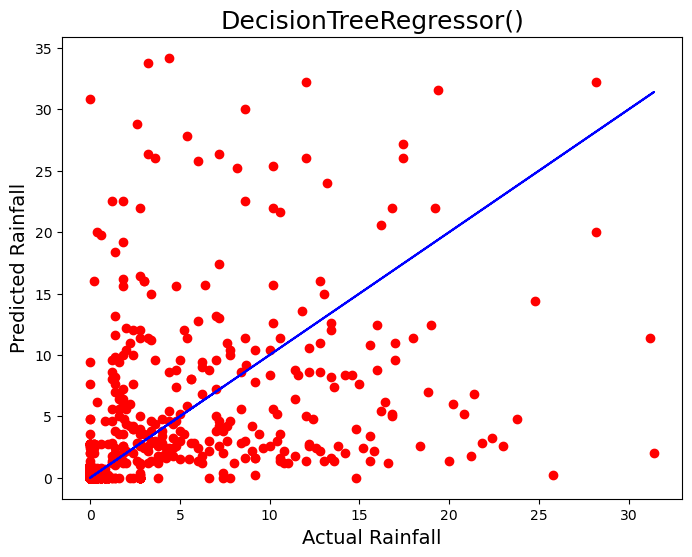



****************** KNeighborsRegressor() *******************


The training accuracy of is 0.6177955899645922
The test accuracy of is 0.44411147782672233
R2 Score is: 44.41114778267223
Cross Validation Scores [0.41835913 0.40665076 0.37096856 0.37218746 0.35105672 0.4829545
 0.48095046]
Maximum of cvs: 0.4829545006118201
Cross Validation Score: 48.29545006118201
R2 Score - Cross Validation Score is -3.8843022785097787
Error Calculations:
Mean absolute error : 1.3487323864996041
Mean squared error :  10.51194538715188
Root mean squared error: 3.24221303852043


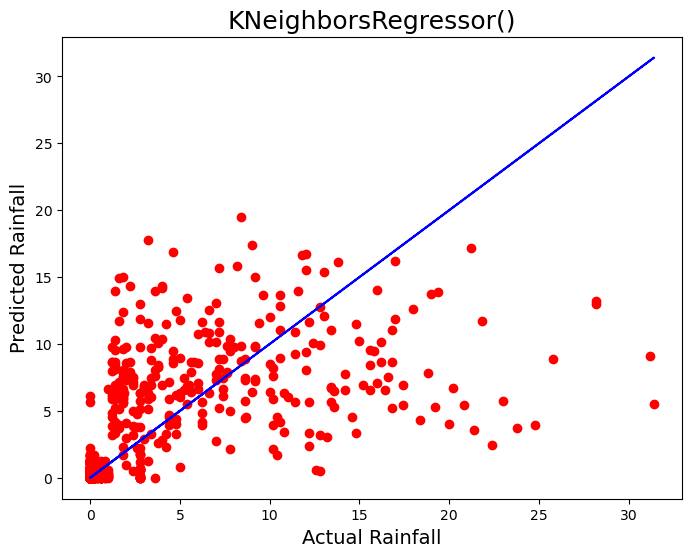



****************** Ridge(alpha=0.01, normalize=True) *******************


The training accuracy of is 0.4866684457249597
The test accuracy of is 0.546332188451968
R2 Score is: 54.633218845196794
Cross Validation Scores [0.50688533 0.50069403 0.45223462 0.49410935 0.41188889 0.56315906
 0.52088517]
Maximum of cvs: 0.5631590616338314
Cross Validation Score: 56.31590616338315
R2 Score - Cross Validation Score is -1.6826873181863533
Error Calculations:
Mean absolute error : 1.4737879552181445
Mean squared error :  8.578934568134663
Root mean squared error: 2.928981831308392


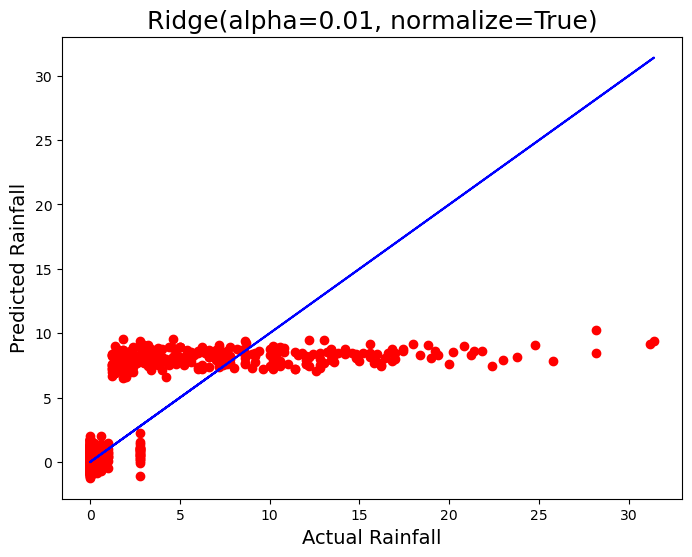



****************** Lasso(alpha=0.01, max_iter=100, normalize=True) *******************


The training accuracy of is 0.33350858411529405
The test accuracy of is 0.3822244523068964
R2 Score is: 38.22244523068964
Cross Validation Scores [0.38676844 0.29815278 0.30233278 0.29770438 0.28041447 0.3695902
 0.3394713 ]
Maximum of cvs: 0.38676843906290803
Cross Validation Score: 38.676843906290806
R2 Score - Cross Validation Score is -0.4543986756011691
Error Calculations:
Mean absolute error : 1.9533836207390243
Mean squared error :  11.682239441604219
Root mean squared error: 3.417929115942023


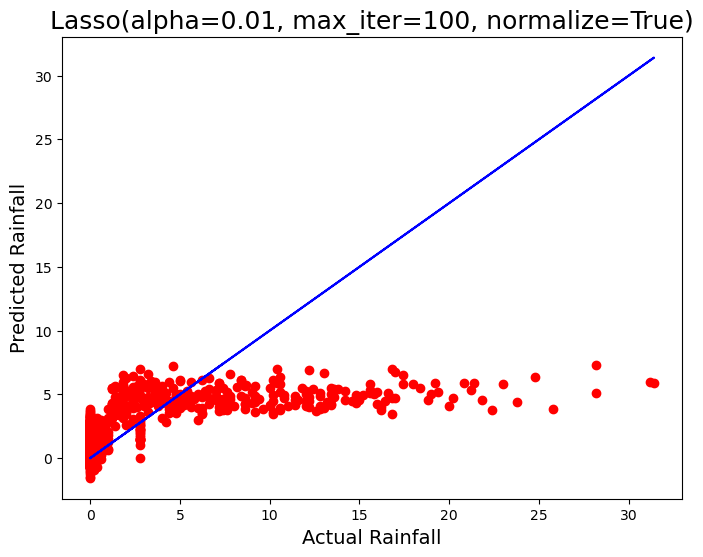



****************** RandomForestRegressor() *******************


The training accuracy of is 0.9250935049562767
The test accuracy of is 0.49192701420948615
R2 Score is: 49.192701420948616
Cross Validation Scores [0.51354055 0.4514259  0.4295951  0.38870881 0.37529096 0.56982317
 0.54752893]
Maximum of cvs: 0.5698231694302014
Cross Validation Score: 56.98231694302014
R2 Score - Cross Validation Score is -7.7896155220715215
Error Calculations:
Mean absolute error : 1.410876777825452
Mean squared error :  9.607745557394809
Root mean squared error: 3.0996363588967673


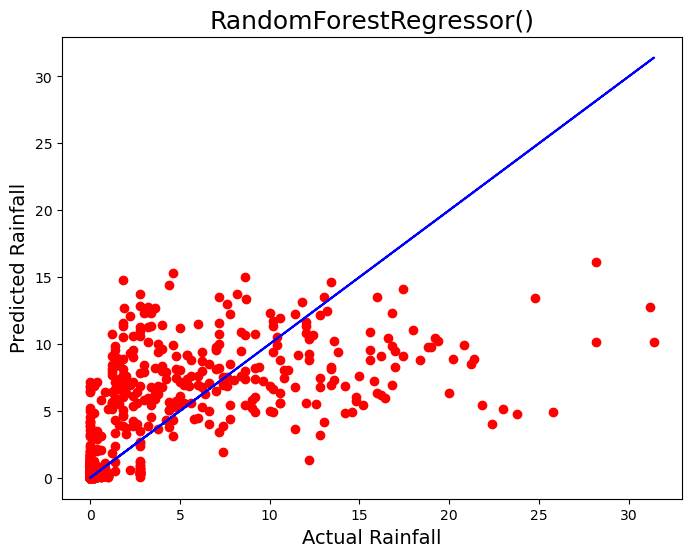



****************** GradientBoostingRegressor(loss='quantile', max_depth=5, n_estimators=200) *******************


The training accuracy of is 0.2667110418116575
The test accuracy of is -0.12429662420456156
R2 Score is: -12.429662420456156
Cross Validation Scores [-0.39658223 -0.06542882  0.01099105 -0.12749121 -0.14893048  0.20541023
  0.15006577]
Maximum of cvs: 0.20541022949834464
Cross Validation Score: 20.541022949834463
R2 Score - Cross Validation Score is -32.97068537029062
Error Calculations:
Mean absolute error : 2.344258281672909
Mean squared error :  21.26063813368965
Root mean squared error: 4.6109259518766565


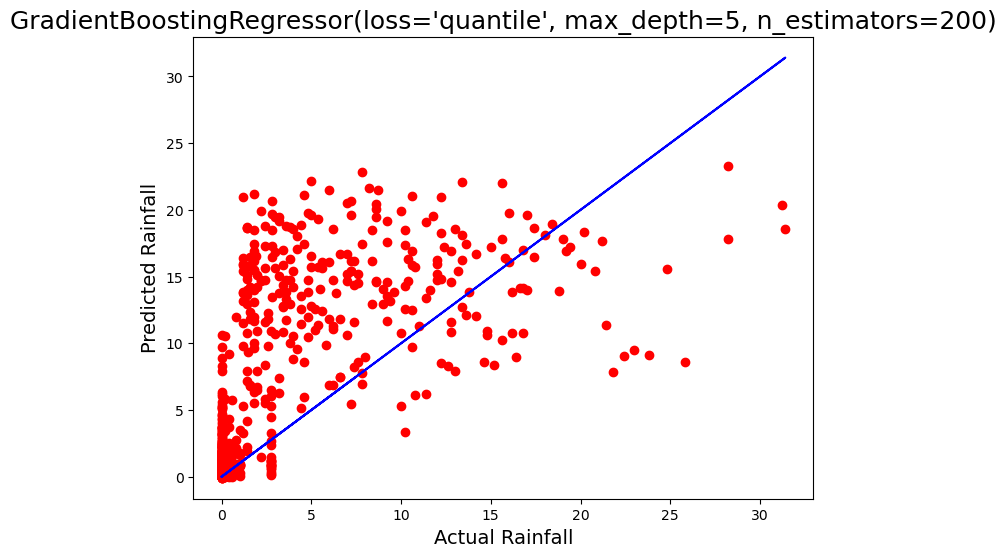



****************** AdaBoostRegressor(learning_rate=1.05, n_estimators=300, random_state=42) *******************


The training accuracy of is 0.4368888167125299
The test accuracy of is 0.31308631063070735
R2 Score is: 31.308631063070735
Cross Validation Scores [-0.10649478  0.08132738  0.35391761  0.20919974  0.11601589  0.33107359
  0.34474018]
Maximum of cvs: 0.3539176111806067
Cross Validation Score: 35.39176111806067
R2 Score - Cross Validation Score is -4.083130054989937
Error Calculations:
Mean absolute error : 1.9364876534489677
Mean squared error :  12.989653321329412
Root mean squared error: 3.604116163684158


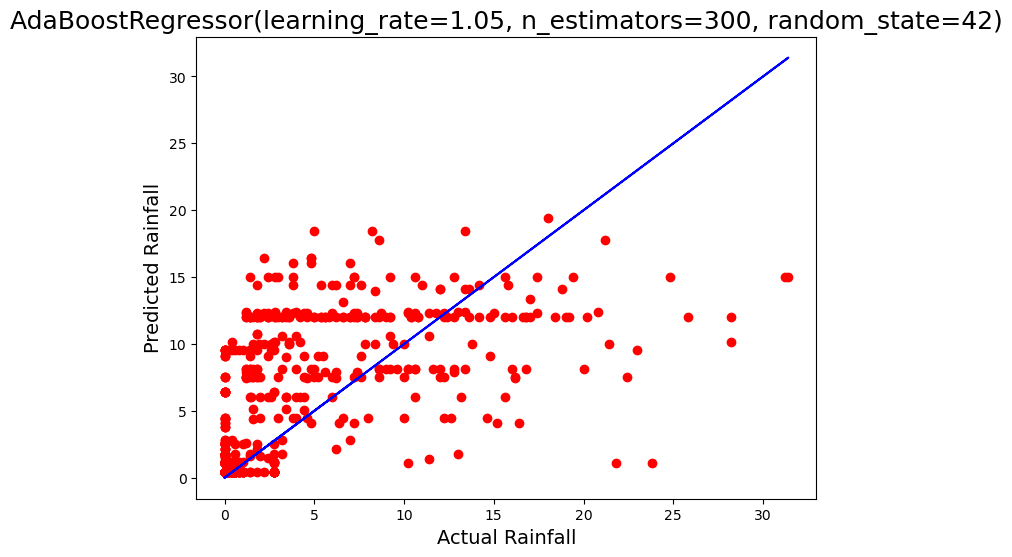



****************** ExtraTreesRegressor(max_features='sqrt', n_estimators=200, n_jobs=6) *******************


The training accuracy of is 1.0
The test accuracy of is 0.5455519646937588
R2 Score is: 54.55519646937588
Cross Validation Scores [0.5096316  0.4872631  0.4501199  0.45763203 0.40238678 0.54287007
 0.49295682]
Maximum of cvs: 0.5428700673421465
Cross Validation Score: 54.28700673421465
R2 Score - Cross Validation Score is 0.26818973516122924
Error Calculations:
Mean absolute error : 1.4885306890180754
Mean squared error :  8.593688730541162
Root mean squared error: 2.9314993997170053


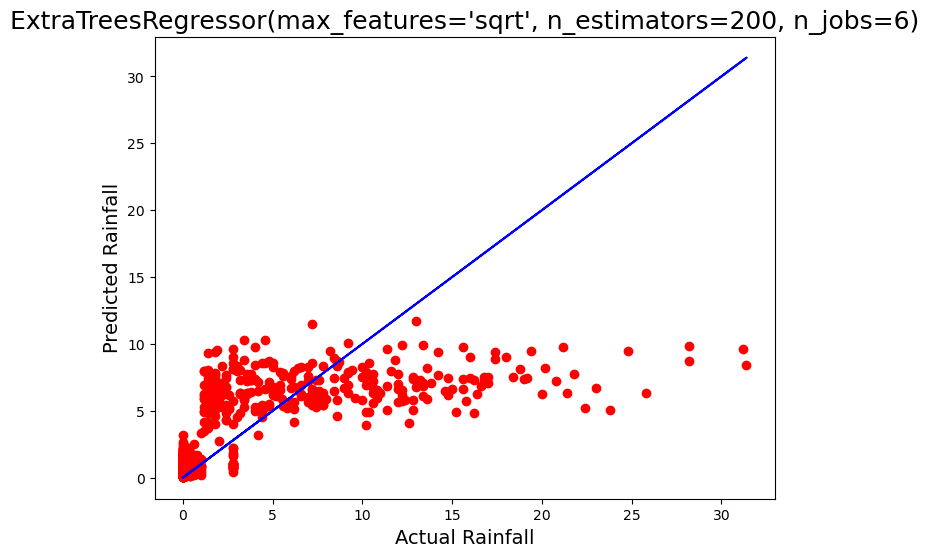

In [80]:
lg  = LinearRegression()
svr = SVR(kernel='rbf')
dtr = DecisionTreeRegressor()
knr = KNeighborsRegressor()
ridr= Ridge(alpha=1e-2, normalize=True)
las = Lasso(alpha=1e-2, normalize=True, max_iter=100)
rfr = RandomForestRegressor()
gbr = GradientBoostingRegressor(loss='quantile', n_estimators=200, max_depth=5)
abr = AdaBoostRegressor(n_estimators=300, learning_rate=1.05, random_state=42)
etr = ExtraTreesRegressor(n_estimators=200, max_features='sqrt', n_jobs=6)


model=[lg,svr,dtr,knr,ridr,las,rfr,gbr,abr,etr]

for m in model:
    print('\n')
    print('******************',m,'*******************')
    print('\n')
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    
    pred_train=m.predict(x_train)
    pred_test=m.predict(x_test)
    
    # calculating scores
    train_score=r2_score(y_train,pred_train)
    test_score=r2_score(y_test,pred_test)
    r2 = r2_score(y_test, pred_test)*100
    
    #Calculating cross validation score
   
    for i in range(2,8):
        cvs=cross_val_score(m,x,y,cv=i)
        
    a = max(cvs)
    cv_score=(a.mean())*100    # taking max value of cvs and calculating mean of it    
# taking max value because I am assuming that r2 score of all models to be approx 100 %

    
    # final result comparing r2 and cross validation
    result = r2 - cv_score
    
    
    print('The training accuracy of is', train_score)
    print('The test accuracy of is', test_score)
    print("R2 Score is:", r2)
    print("Cross Validation Scores",cvs)
    print("Maximum of cvs:" , a)
    print("Cross Validation Score:", cv_score)
    print("R2 Score - Cross Validation Score is", result)
    print("Error Calculations:")
    print("Mean absolute error :",mean_absolute_error(y_test,pred_test))
    print("Mean squared error : ",mean_squared_error(y_test, pred_test))
    print("Root mean squared error:", np.sqrt(mean_squared_error(y_test,pred_test)))
    
    plt.figure(figsize=(8,6))
    plt.scatter(x=y_test,y=pred_test,color='r')
    plt.plot(y_test,y_test,color='b')
    plt.xlabel('Actual Rainfall',fontsize=14)
    plt.ylabel('Predicted Rainfall',fontsize=14)
    plt.title(m,fontsize=18)
    plt.show()
    

   

In [81]:
#Plotting performance table

Performance_table=pd.DataFrame({'Model':['LR','SVR','DTR','KNR','ridge','lasso','RFR','GBR','ABR','ETR'],                    
            'R2 Score': [54.57,47.77,-7.37,44.41,54.63,38.22,49.19,-12.42,31.30,54.90],
            'CV Score': [56.37,46.17,22.84,48.29,56.31,38.67,56.98,20.54,35.39,53.29],
            'Result' :[-1.80,1.59,-30.21,-3.88,-1.68,-0.45,-7.78,-32.97,-4.08,1.61],
           'RMSE':[2.93,3.14,4.50,3.24,2.92,3.41,3.09,4.61,3.60,2.92],
            'MSE':[8.59,9.87,20.30,10.51,8.57,11.68,9.60,21.26,12.98,8.52]})

Performance_table

,Model,R2 Score,CV Score,Result,RMSE,MSE
0,LR,54.57,56.37,-1.80,2.93,8.59
1,SVR,47.77,46.17,1.59,3.14,9.87
2,DTR,-7.37,22.84,-30.21,4.50,20.30
3,KNR,44.41,48.29,-3.88,3.24,10.51
4,ridge,54.63,56.31,-1.68,2.92,8.57
5,lasso,38.22,38.67,-0.45,3.41,11.68
6,RFR,49.19,56.98,-7.78,3.09,9.60
7,GBR,-12.42,20.54,-32.97,4.61,21.26
8,ABR,31.30,35.39,-4.08,3.60,12.98
9,ETR,54.90,53.29,1.61,2.92,8.52


From above table we see ETR gives best results. So I chose Ectra trees classifier

# Hypertuning 

In [82]:
param = {'n_estimators':[10,50,60],
        'criterion':['squared_error', 'absolute_error'],
        'max_depth':[2,4],'min_samples_split':[2,5,8],
        'max_features':['sqrt', 'log2', 'None']}

In [83]:
GCV = GridSearchCV(ExtraTreesRegressor(), param, cv=5)

In [84]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [2, 4],
                         'max_features': ['sqrt', 'log2', 'None'],
                         'min_samples_split': [2, 5, 8],
                         'n_estimators': [10, 50, 60]})

In [85]:
GCV.best_params_

{'criterion': 'squared_error',
 'max_depth': 4,
 'max_features': 'log2',
 'min_samples_split': 8,
 'n_estimators': 10}

In [86]:
GCV.best_score_

0.20030525073851752

In [88]:
# fitting hypertuning paramerter in final model
Final_Model = ExtraTreesRegressor(n_estimators=10,criterion='squared_error', max_depth=4,max_features='log2' ,min_samples_split=8)
Classifier = Final_Model.fit(x_train, y_train)
fmod_pred = Final_Model.predict(x_test)
fmod_r2 = r2_score(y_test, fmod_pred)*100
print("R2 score for the Best Model is:", fmod_r2)

R2 score for the Best Model is: 24.540862146553145


# Saving The Regression Model

In [89]:
filename = "RainfallRegression_E08.pkl"
joblib.dump(Final_Model, filename)

['RainfallRegression_E08.pkl']

# Thanks for evaluating 